<a href="https://colab.research.google.com/github/umaimaparveen-com/prediction-asteroid-detection-model-gaiadr3/blob/main/Part1_AsteroidDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

In [ ]:
!pip install astroquery astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.9/912.9 kB 30.6 MB/s eta 0:00:00


In [ ]:
from astroquery.gaia import Gaia
import numpy as np
import pandas as pd
import astropy

In [ ]:
gaiadr3_orbits = Gaia.load_table('gaiadr3.sso_orbits')
print(gaiadr3_orbits)

TAP Table name: gaiadr3.gaiadr3.sso_orbits
Description: Orbital parameters and uncertainties computed from the {\tt sso\_observation} astrometric data. The content of the table is described in the DR3 publication \cite{DR3-DPACP-150}.  
Num. columns: 15


In [ ]:
for column in gaiadr3_orbits.columns:
  print(column.name)

number_mp
denomination
osc_epoch
mean_anomaly
arg_perihelion
long_asc_node
inclination
eccentricity
semi_major_axis
orbital_elements_var_covar_matrix
std_dev_semi_major_axis
h_state_vector
h_state_vector_var_covar_matrix
arc_length
num_observations


In [ ]:
myquery="Select * from gaiadr3.sso_reflectance_spectrum"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table= job.get_results()
df=table.to_pandas()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c4fc29026c2512678408531330c515207536570116a60a4756b9d710a989cae7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
myquery="Select  from gaiadr3.sso_orbits"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table= job.get_results()
table.info
df1=table.to_pandas()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
table.info

<Table length=154741>
               name                dtype      unit                            description                        
--------------------------------- ------- ------------ ----------------------------------------------------------
                        number_mp   int32                                                              SSO Number
                     denomination  object                                                Solar system object name
                        osc_epoch float64            d                       Reference epoch for osculating orbit
                     mean_anomaly float64          rad                                               Mean anomaly
                   arg_perihelion float64          rad                                     Argument of perihelion
                    long_asc_node float64          rad                                Longitude of ascending node
                      inclination float64          rad            

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154741 entries, 0 to 154740
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   number_mp                          154741 non-null  int32  
 1   denomination                       154741 non-null  object 
 2   osc_epoch                          154741 non-null  float64
 3   mean_anomaly                       154741 non-null  float64
 4   arg_perihelion                     154741 non-null  float64
 5   long_asc_node                      154741 non-null  float64
 6   inclination                        154741 non-null  float64
 7   eccentricity                       154741 non-null  float64
 8   semi_major_axis                    154741 non-null  float64
 9   orbital_elements_var_covar_matrix  154741 non-null  object 
 10  std_dev_semi_major_axis            154741 non-null  float64
 11  h_state_vector                     1547

In [ ]:
df1.describe()

number_mp      osc_epoch   mean_anomaly  arg_perihelion  \
count  154741.000000  154741.000000  154741.000000   154741.000000   
mean   100511.204800    2206.578819       0.039213       -0.037793   
std     79353.676853     110.506729       1.618021        1.809168   
min         1.000000    1720.000000      -3.141411       -3.141562   
25%     39438.000000    2162.000000      -1.115435       -1.602427   
50%     82372.000000    2204.000000       0.060387       -0.084841   
75%    140085.000000    2255.000000       1.203512        1.533659   
max    399961.000000    2658.000000       3.141522        3.141571   

       long_asc_node    inclination   eccentricity  semi_major_axis  \
count  154741.000000  154741.000000  154741.000000    154741.000000   
mean        2.951974       0.165242       0.139399         2.688531   
std         1.803142       0.110297       0.069551         0.656870   
min         0.000014       0.000387       0.000328         0.642279   
25%         1.409847       0.081809       0.087844         2.383032   
50%         2.773107       0.141533       0.133502         2.626714   
75%         4.480133       0.225978       0.183059         2.976835   
max         6.283097       1.259354       0.894957        67.696102   

       std_dev_semi_major_axis     arc_length  num_observations  
count             1.547410e+05  154741.000000     154741.000000  
mean              6.967890e-06     724.967268        148.840340  
std               7.791059e-05     231.443213         82.812839  
min               1.751566e-10      60.095805         21.000000  
25%               3.190999e-08     599.840805         87.000000  
50%               9.063456e-08     766.283145        130.000000  
75%               3.300968e-07     917.443068        189.000000  
max               2.271010e-02    1026.520497        807.000000

#Data Extraction of Asteroids.

In [ ]:
!pip install astroquery astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 34.4 MB/s eta 0:00:00


In [ ]:
from astroquery.gaia import Gaia
import numpy as np
import pandas as pd
import astropy

In [ ]:
from astropy.table import Table
import gzip

In [ ]:
myquery="Select * from gaiadr3.sso_source"
job=Gaia.launch_job_async(myquery, dump_to_file=True)
table= job.get_results()
sso_source=table.to_pandas()

Alternate method to load the full table of sso_observation

In [ ]:
with gzip.open('/content/1731073056310O-result.vot.gz', 'rb') as f:
    data = Table.read(f, format='votable')

In [ ]:
myquery="SELECT TOP 200000 * FROM gaiadr3.sso_observation where g_flux> 30000 "
job=Gaia.launch_job_async(myquery, dump_to_file=True)
table= job.get_results()
sso_observation=table.to_pandas()

In [ ]:
sso_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103787 entries, 0 to 103786
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   solution_id                    103787 non-null  int64  
 1   SOURCE_ID                      103787 non-null  int64  
 2   denomination                   103787 non-null  object 
 3   TRANSIT_ID                     103787 non-null  int64  
 4   observation_id                 103787 non-null  int64  
 5   number_mp                      103787 non-null  int64  
 6   epoch                          103787 non-null  float64
 7   epoch_err                      103787 non-null  float64
 8   epoch_utc                      103787 non-null  float64
 9   ra                             103787 non-null  float64
 10  dec                            103787 non-null  float64
 11  ra_error_systematic            103787 non-null  float64
 12  dec_error_systematic          

In [ ]:
'''myquery="Select * from gaiadr3.sso_observation"
job=Gaia.launch_job_sync(myquery, dump_to_file=False)
table= job.get_results()
sso_observation=table.to_pandas()'''

In [ ]:
myquery="Select * from gaiadr3.sso_reflectance_spectrum"
job=Gaia.launch_job_async(myquery, dump_to_file=True)
table= job.get_results()
sso_reflectance_spectrum=table.to_pandas()

In [ ]:
myquery="Select * from gaiadr3.sso_orbits"
job=Gaia.launch_job_async(myquery, dump_to_file=True)
table= job.get_results()
sso_orbits=table.to_pandas()

In [ ]:
rows = len(sso_source.axes[0])
cols = len(sso_source.axes[1])
print("sso_source")
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

'''rows = len(sso_reflectance_spectrum.axes[0])
cols = len(sso_reflectance_spectrum.axes[1])
print("sso_reflectance_spectrum")
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)
'''
rows = len(sso_orbits.axes[0])
cols = len(sso_orbits.axes[1])
print("sso_orbits")
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

sso_source
Number of Rows:  158152
Number of Columns:  6
sso_orbits
Number of Rows:  154741
Number of Columns:  15


In [ ]:
rows = len(sso_observation.axes[0])
cols = len(sso_observation.axes[1])
print("sso_observation")
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

sso_observation
Number of Rows:  103787
Number of Columns:  35


In [ ]:
#common_asteroids=list(set(sso_source.denomination) & set(sso_reflectance_spectrum.denomination) & set(sso_observation.denomination) & set(sso_orbits.denomination))
all_asteroids=list(set(sso_source.denomination) & set(sso_orbits.denomination) & set(sso_observation.denomination))

print(len(all_asteroids))

783


In [ ]:
common_asteroids=list(set(sso_source.denomination) & set(sso_observation.denomination) & set(sso_orbits.denomination))

print(len(common_asteroids))

783


these two commands uses the list function is storing the string of all the denomination names of the common asteroids which are common in all the three tables.

In [ ]:
# find how many common asteroids are between the source and the reflectance dataframes
common_asteroids= sso_source[sso_source.denomination.isin(sso_orbits.denomination)]
print(len(common_asteroids))
#print(uncommon_asteroids)

19357


In [ ]:
# find how many common asteroids are between the source and the orbits dataframes
common_asteroids= sso_orbits[sso_orbits.denomination.isin(sso_source.denomination)]
print(len(common_asteroids))

19357


In [ ]:
# find how many common asteroids are between the source and the observation dataframes
common_asteroids= sso_observation[sso_observation.denomination.isin(sso_source.denomination)]
print(len(common_asteroids))

103787


In [ ]:
# find how many uncommon asteroids are between the source and the reflectance dataframes
uncommon_asteroids= sso_source[~sso_source.denomination.isin(sso_orbits.denomination)]
print(len(uncommon_asteroids))
#print(uncommon_asteroids)

138795


#Function for hazardous found online

In [ ]:
import numpy as np

def orbital_elements_to_cartesian(a, e, i, Omega, omega, M):
    # Convert orbital elements to Cartesian coordinates
    # Mean anomaly to eccentric anomaly
    E = M + (e * np.sin(M))  # Simplified for small e
    x = a * (np.cos(E) - e)
    y = a * np.sqrt(1 - e**2) * np.sin(E)

    # Rotate to account for inclination and node
    x_rot = x * (np.cos(Omega) * np.cos(omega) - np.sin(Omega) * np.sin(omega) * np.cos(i))
    y_rot = y * (np.cos(omega) * np.sin(i))

    return np.array([x_rot, y_rot])

def calculate_moid(a1, e1, i1, Omega1, omega1, M1,
                   a2, e2, i2, Omega2, omega2, M2):
    # Get Cartesian coordinates for both orbits
    pos1 = orbital_elements_to_cartesian(a1, e1, i1, Omega1, omega1, M1)
    pos2 = orbital_elements_to_cartesian(a2, e2, i2, Omega2, omega2, M2)

    # Calculate the distance between the two positions
    distance = np.linalg.norm(pos1 - pos2)

    return distance,pos1,pos2

In [ ]:
# Example usage:
a1 = 3.248966  # Semi-major axis for body 1 in AU
e1 = 0.042493  # Eccentricity for body 1
i1 = np.radians(0.399102)  # Inclination in radians
Omega1 = np.radians(2.494781)  # Longitude of ascending node in radians
omega1 = np.radians(-2.481794)  # Argument of perihelion in radians
M1 = np.radians(3.071927)  # Mean anomaly in radians

a2 = 1.0000010178	  # Semi-major axis for earth in AU (example value)
e2 = 0.0167086	 # Eccentricity for body 2 (example value)
i2 = np.radians(7.155)  # Inclination for body 2 in radians (example value)
Omega2 = np.radians(174.9)  # Longitude of ascending node for body 2 in radians (example value)
omega2 = np.radians(288.1)  # Argument of perihelion for body 2 in radians (example value)
M2 = np.radians(5.15)  # Mean anomaly for body 2 in radians (example value)

moid_distance,pos1,pos2 = calculate_moid(a1, e1, i1, Omega1, omega1, M1,
                                a2, e2, i2, Omega2, omega2, M2)

print(f"Minimum Orbital Intersection Distance (MOID): {moid_distance} AU")

Minimum Orbital Intersection Distance (MOID): 3.3267329995197317 AU


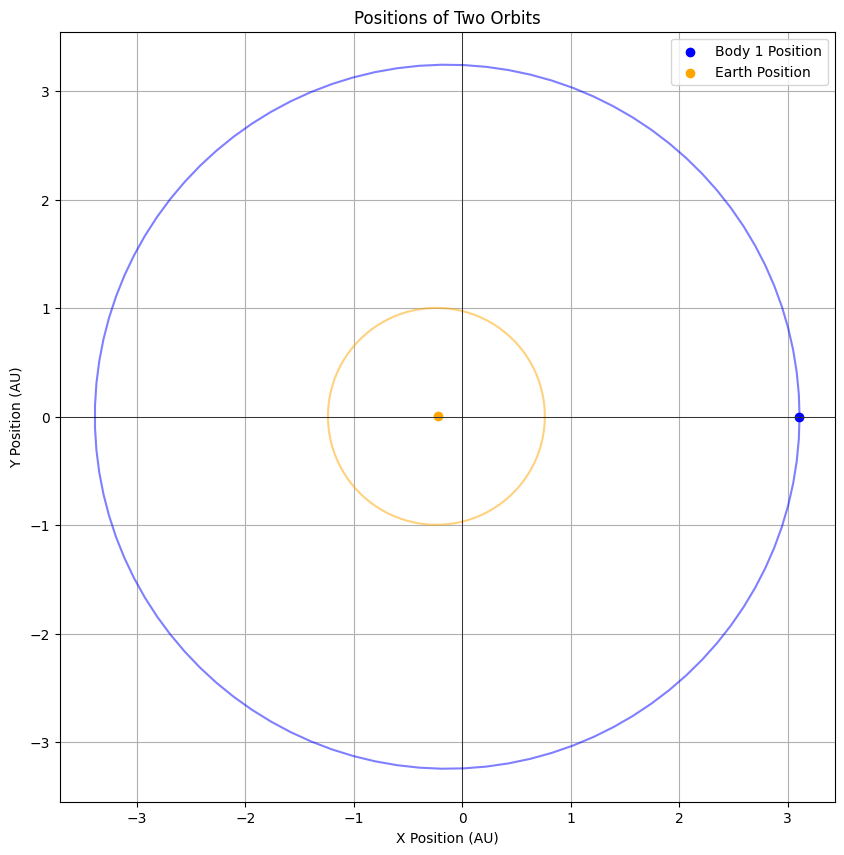

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(pos1[0], pos1[1], color='blue', label='Body 1 Position')
plt.scatter(pos2[0], pos2[1], color='orange', label='Earth Position')
theta = np.linspace(0, 2 * np.pi, 100)
x_orbit_1 = a1 * (np.cos(theta) - e1)
y_orbit_1 = a1 * np.sqrt(1 - e1**2) * np.sin(theta)

x_orbit_2 = a2 * (np.cos(theta) - e2)
y_orbit_2 = a2 * np.sqrt(1 - e2**2) * np.sin(theta)

plt.plot(x_orbit_1, y_orbit_1, color='blue', alpha=0.5)
plt.plot(x_orbit_2 + pos2[0], y_orbit_2 + pos2[1], color='orange', alpha=0.5)

plt.title('Positions of Two Orbits')
plt.xlabel('X Position (AU)')
plt.ylabel('Y Position (AU)')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

#find the asteroids earth crossing orbit:


In [ ]:
# find how many common asteroids are between the source and the reflectance dataframes
common_asteroids= sso_orbits[sso_orbits.denomination.isin(sso_source.denomination)]
print(len(common_asteroids))
#print(uncommon_asteroids)

19357


In [ ]:
common_asteroids.head()

number_mp denomination  osc_epoch  mean_anomaly  arg_perihelion  \
1        36061      haldane     2131.0      2.580352        0.512960   
4        37452       spirit     2313.0     -0.105872        0.842289   
17       51431     jayardee     2083.0     -1.909044       -2.397883   
111       1140       crimea     2158.0     -1.285989       -0.866734   
112       4146   rudolfinum     2227.0      0.313839       -0.677120   

     long_asc_node  inclination  eccentricity  semi_major_axis  \
1         1.894826     0.061298      0.063186         3.256504   
4         6.149053     0.144239      0.220845         3.952545   
17        0.717723     0.063502      0.152155         2.424891   
111       1.259254     0.246696      0.113215         2.771499   
112       2.963483     0.082091      0.106608         2.259303   

                     orbital_elements_var_covar_matrix  \
1    [1.195962337616274e-13, -2.3106977910417066e-1...   
4    [1.4159535390277956e-13, 2.403003988711015e-14...   
17   [4.902850153154096e-15, -1.7148297410174686e-1...   
111  [8.970480895151274e-18, 9.709304016479648e-19,...   
112  [2.8428683150871224e-18, 2.5607272507620408e-1...   

     std_dev_semi_major_axis  \
1               3.458269e-07   
4               3.762916e-07   
17              7.002036e-08   
111             2.995076e-09   
112             1.686081e-09   

                                        h_state_vector  \
1    [1.1410703991721014, -2.970485049191334, -1.29...   
4    [2.6482498486420285, 1.324374191581004, 0.8755...   
17   [-1.95566341790586, 1.4904130008779202, 0.8238...   
111  [1.1349669365832051, -2.0430412749691973, -1.3...   
112  [-1.8165050103872515, 0.8554517227462493, 0.31...   

                       h_state_vector_var_covar_matrix  arc_length  \
1    [1.0348005518223577e-14, -1.3481821711050326e-...  858.918013   
4    [1.2577060318517344e-15, 1.6271771016929825e-1...  733.799490   
17   [1.898669237746236e-15, 1.118440924227189e-15,...  669.822367   
111  [1.0312474804128336e-18, 5.382314183946853e-19...  924.261646   
112  [1.0420260228637116e-17, -1.6451286989463417e-...  928.183983   

     num_observations  
1                  75  
4                 199  
17                 94  
111               207  
112               152

In [ ]:
duplicates = common_asteroids[common_asteroids.duplicated(subset='denomination')]

# Display duplicates if any exist
if not duplicates.empty:
    print("Duplicates found in 'denomination':")
else:
    print("No duplicates found in 'denomination'")

No duplicates found in 'denomination'


In [ ]:
neo = common_asteroids[
    (common_asteroids['semi_major_axis'] > 1) &
    (common_asteroids['eccentricity'] < 1)
]

# Display the first few rows of the filtered DataFrame
neo=neo.reset_index(drop=True)
neo.head()

number_mp denomination  osc_epoch  mean_anomaly  arg_perihelion  \
0      36061      haldane     2131.0      2.580352        0.512960   
1      37452       spirit     2313.0     -0.105872        0.842289   
2      51431     jayardee     2083.0     -1.909044       -2.397883   
3       1140       crimea     2158.0     -1.285989       -0.866734   
4       4146   rudolfinum     2227.0      0.313839       -0.677120   

   long_asc_node  inclination  eccentricity  semi_major_axis  \
0       1.894826     0.061298      0.063186         3.256504   
1       6.149053     0.144239      0.220845         3.952545   
2       0.717723     0.063502      0.152155         2.424891   
3       1.259254     0.246696      0.113215         2.771499   
4       2.963483     0.082091      0.106608         2.259303   

                   orbital_elements_var_covar_matrix  std_dev_semi_major_axis  \
0  [1.195962337616274e-13, -2.3106977910417066e-1...             3.458269e-07   
1  [1.4159535390277956e-13, 2.403003988711015e-14...             3.762916e-07   
2  [4.902850153154096e-15, -1.7148297410174686e-1...             7.002036e-08   
3  [8.970480895151274e-18, 9.709304016479648e-19,...             2.995076e-09   
4  [2.8428683150871224e-18, 2.5607272507620408e-1...             1.686081e-09   

                                      h_state_vector  \
0  [1.1410703991721014, -2.970485049191334, -1.29...   
1  [2.6482498486420285, 1.324374191581004, 0.8755...   
2  [-1.95566341790586, 1.4904130008779202, 0.8238...   
3  [1.1349669365832051, -2.0430412749691973, -1.3...   
4  [-1.8165050103872515, 0.8554517227462493, 0.31...   

                     h_state_vector_var_covar_matrix  arc_length  \
0  [1.0348005518223577e-14, -1.3481821711050326e-...  858.918013   
1  [1.2577060318517344e-15, 1.6271771016929825e-1...  733.799490   
2  [1.898669237746236e-15, 1.118440924227189e-15,...  669.822367   
3  [1.0312474804128336e-18, 5.382314183946853e-19...  924.261646   
4  [1.0420260228637116e-17, -1.6451286989463417e-...  928.183983   

   num_observations  
0                75  
1               199  
2                94  
3               207  
4               152

In [ ]:
asteroid=neo['denomination']
asteroid

0             haldane
1              spirit
2            jayardee
3              crimea
4          rudolfinum
             ...     
19345     pamelasobey
19346    andreashofer
19347        taborsko
19348       joseflada
19349      bartolucci
Name: denomination, Length: 19350, dtype: object

In [ ]:
neo.describe()

number_mp     osc_epoch  mean_anomaly  arg_perihelion  \
count   19350.000000  19350.000000  19350.000000    19350.000000   
mean    20905.518501   2202.252300      0.029194       -0.007313   
std     31655.841073     59.348837      1.809687        1.817292   
min         1.000000   1721.000000     -3.140364       -3.141420   
25%      4987.250000   2170.000000     -1.510793       -1.570118   
50%     11522.500000   2200.000000      0.057665       -0.037373   
75%     24437.000000   2226.000000      1.575464        1.580027   
max    366272.000000   2609.000000      3.141340        3.141303   

       long_asc_node   inclination  eccentricity  semi_major_axis  \
count   19350.000000  19350.000000  19350.000000     19350.000000   
mean        2.952144      0.128930      0.138471         2.675801   
std         1.758020      0.101078      0.069604         1.058867   
min         0.000304      0.000387      0.001452         1.006938   
25%         1.502326      0.056075      0.089232         2.339516   
50%         2.833420      0.100910      0.133831         2.578713   
75%         4.310090      0.173349      0.178804         2.909358   
max         6.282964      1.117106      0.889864        67.696102   

       std_dev_semi_major_axis    arc_length  num_observations  
count             1.935000e+04  19350.000000      19350.000000  
mean              1.993486e-06    853.423968        189.335969  
std               1.636740e-04    136.453199         87.264608  
min               1.763292e-10     60.251064         21.000000  
25%               8.820548e-09    781.931033        128.000000  
50%               2.038988e-08    886.963748        172.000000  
75%               4.726462e-08    954.093568        233.000000  
max               2.271010e-02   1026.028280        807.000000

In [ ]:
neo.to_csv('neo.csv', index=False)

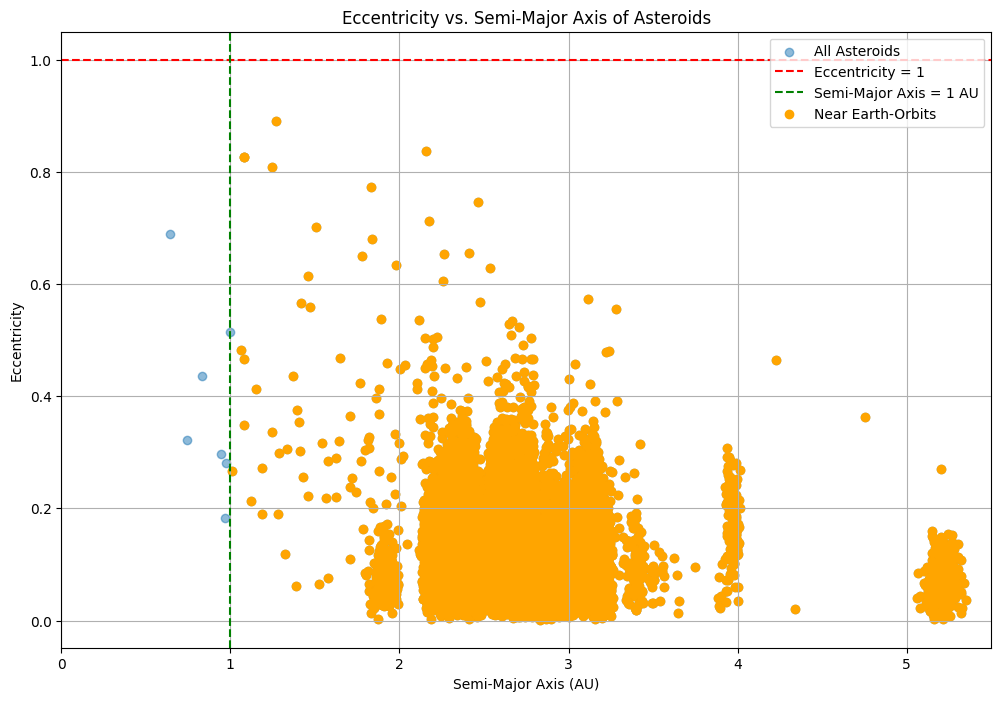

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(common_asteroids['semi_major_axis'], common_asteroids['eccentricity'], alpha=0.5, label='All Asteroids')
plt.axhline(y=1, color='r', linestyle='--', label='Eccentricity = 1')
plt.axvline(x=1, color='g', linestyle='--', label='Semi-Major Axis = 1 AU')

# Highlight Earth-crossing orbit asteroids
plt.scatter(neo['semi_major_axis'], neo['eccentricity'], color='orange', label='Near Earth-Orbits')
plt.title('Eccentricity vs. Semi-Major Axis of Asteroids')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Eccentricity')
plt.xlim(0, 5.5)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Scatter(
    x=common_asteroids['semi_major_axis'],
    y=common_asteroids['eccentricity'],
    mode='markers',
    name='All Asteroids',
    marker=dict(color='orange', size=6),
    text=common_asteroids['denomination'],
    hovertemplate='<b>%{text}</b><br>Semi-Major Axis: %{x} AU<br>Eccentricity: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=neo['semi_major_axis'],
    y=neo['eccentricity'],
    mode='markers',
    name='Near Earth-Orbits',
    marker=dict(color='blue', size=8),
    text=neo['denomination'],
    hovertemplate='<b>%{text}</b><br>Semi-Major Axis: %{x} AU<br>Eccentricity: %{y}<extra></extra>'
))

fig.update_layout(
    title='Eccentricity vs. Semi-Major Axis of Asteroids',
    xaxis_title='Semi-Major Axis (AU)',
    yaxis_title='Eccentricity',
    legend_title='Asteroids near Earth-Orbits',
    xaxis=dict(range=[0, 70]),
    yaxis=dict(range=[0, 1.5]),
    template='plotly_white'
)

fig.show()

#find the asteroids with high velocities and small distances from earth

In [ ]:
common_asteroids_1= sso_observation[sso_observation.denomination.isin(sso_source.denomination)]
print(len(common_asteroids_1))

103787


In [ ]:
duplicates = common_asteroids_1[common_asteroids_1.duplicated(subset='denomination')]

# Display duplicates if any exist
if not duplicates.empty:
    print("Duplicates found in 'denomination':")
else:
    print("No duplicates found in 'denomination'")

Duplicates found in 'denomination':


In [ ]:
rows = len(common_asteroids_1.axes[0])
cols = len(common_asteroids_1.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  103787
Number of Columns:  35


In [ ]:
rows = len(duplicates.axes[0])
cols = len(duplicates.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  103000
Number of Columns:  35


In [ ]:
boolean = common_asteroids_1['denomination'].duplicated().any() # True
print(boolean)
duplicate_rows = common_asteroids_1.duplicated(subset=['denomination'])
print(duplicate_rows)

True
0         False
1          True
2          True
3          True
4          True
          ...  
103782     True
103783     True
103784     True
103785     True
103786     True
Length: 103787, dtype: bool


In [ ]:
duplicates['denomination'].nunique()

787

In [ ]:
denomination_counts = duplicates['denomination'].value_counts()
denomination_counts

denomination
rachele       514
loreley       495
lucina        482
proserpina    461
bertha        456
             ... 
jessonda        6
mireille        6
drakonia        5
nora            4
arnolda         4
Name: count, Length: 787, dtype: int64

In [ ]:
sorted_asteroids = duplicates.sort_values(by=['denomination', 'epoch'], ascending=[True, False])
unique_most_recent = sorted_asteroids.drop_duplicates(subset='denomination', keep='first')

# Check the resulting DataFrame to confirm duplicates were removed and only the most recent epochs are kept
print("Number of rows after keeping only the most recent epoch for each unique denomination:", len(unique_most_recent))

Number of rows after keeping only the most recent epoch for each unique denomination: 787


In [ ]:
unique_most_recent.head()

solution_id   SOURCE_ID denomination         TRANSIT_ID  \
96154   4167557769036431377 -4284708136    2001 cp44  17283051591071282   
2866    4428731357481467921 -4284960526       aaltje  68177693803693870   
102101  4428731357481467921 -4284962736       abnoba  71800358636404971   
78869   4428731357481467921 -4284965786   abundantia  64243531319354803   
57348   4428731357481467921 -4284962066          ada  47373259784860347   

            observation_id  number_mp        epoch     epoch_err    epoch_utc  \
96154   172830515910712829      25916  1709.399215  1.137500e-08  1709.398224   
2866    681776938036938708        677  2629.802858  1.137500e-08  2629.801829   
102101  718003586364049718        456  2695.316907  1.137500e-08  2695.315878   
78869   642435313193548039        151  2558.655588  1.137500e-08  2558.654560   
57348   473732597848603475        523  2253.565089  1.137500e-08  2253.564078   

                ra  ...   vz_gaia  x_gaia_geocentric  y_gaia_geocentric  \
96154    20.795341  ...  0.006636           0.008642          -0.004622   
2866    242.679924  ... -0.006915          -0.009232           0.000015   
102101  338.155055  ... -0.003675          -0.004411          -0.008810   
78869   335.652855  ... -0.001467          -0.000620           0.009963   
57348    68.920942  ... -0.006635          -0.008515           0.003116   

        z_gaia_geocentric  vx_gaia_geocentric  vy_gaia_geocentric  \
96154           -0.001010            0.000076            0.000173   
2866             0.001137           -0.000020           -0.000233   
102101          -0.004332            0.000103           -0.000033   
78869            0.003065           -0.000120           -0.000017   
57348            0.002286           -0.000072           -0.000211   

        vz_gaia_geocentric  position_angle_scan  \
96154             0.000100           216.083286   
2866             -0.000087           235.037439   
102101           -0.000052           204.457331   
78869             0.000005           319.074296   
57348            -0.000062           306.898146   

                    astrometric_outcome_ccd  astrometric_outcome_transit  
96154     [12, 35, 35, 1, 1, 1, 1, 1, 1, 1]                            1  
2866      [12, 1, 1, 1, 1, 11, 1, 1, 1, 11]                            1  
102101     [12, 1, 1, 1, 1, 1, 1, 1, 1, 11]                            1  
78869       [12, 1, 1, 1, 1, 1, 1, 1, 1, 1]                            1  
57348   [12, 1, 1, 1, 1, 1, 11, 11, 11, 11]                            1  

[5 rows x 35 columns]

In [ ]:
unique_asteroids=unique_most_recent.reset_index(drop=True)

In [ ]:
unique_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   solution_id                    787 non-null    int64  
 1   SOURCE_ID                      787 non-null    int64  
 2   denomination                   787 non-null    object 
 3   TRANSIT_ID                     787 non-null    int64  
 4   observation_id                 787 non-null    int64  
 5   number_mp                      787 non-null    int64  
 6   epoch                          787 non-null    float64
 7   epoch_err                      787 non-null    float64
 8   epoch_utc                      787 non-null    float64
 9   ra                             787 non-null    float64
 10  dec                            787 non-null    float64
 11  ra_error_systematic            787 non-null    float64
 12  dec_error_systematic           787 non-null    flo

In [ ]:
unique_asteroids['velocity'] = np.sqrt(unique_asteroids['vx_gaia_geocentric']**2 + unique_asteroids['vy_gaia_geocentric']**2 + unique_asteroids['vz_gaia_geocentric']**2) * 86400  # Convert AU/day to km/s

In [ ]:
unique_asteroids['distance'] = np.sqrt(unique_asteroids['x_gaia_geocentric']**2 + unique_asteroids['y_gaia_geocentric']**2 + unique_asteroids['z_gaia_geocentric']**2)  # Distance in AU

In [ ]:
unique_asteroids.describe()

solution_id     SOURCE_ID    TRANSIT_ID  observation_id  \
count  7.870000e+02  7.870000e+02  7.870000e+02    7.870000e+02   
mean   4.289682e+18 -4.284960e+09  5.865460e+16    5.865460e+17   
std    1.303952e+17  4.876920e+04  1.563773e+16    1.563773e+17   
min    4.167558e+18 -4.284967e+09  1.623433e+16    1.623433e+17   
25%    4.167558e+18 -4.284965e+09  5.056864e+16    5.056864e+17   
50%    4.167558e+18 -4.284963e+09  6.492504e+16    6.492504e+17   
75%    4.428731e+18 -4.284960e+09  7.108297e+16    7.108297e+17   
max    4.428731e+18 -4.283624e+09  7.229803e+16    7.229803e+17   

           number_mp        epoch     epoch_err    epoch_utc          ra  \
count     787.000000   787.000000  7.870000e+02   787.000000  787.000000   
mean      743.435832  2457.582636  1.137500e-08  2457.581617  190.515478   
std      4876.920147   282.800381  7.614901e-23   282.800369  110.780999   
min         1.000000  1690.433577  1.137500e-08  1690.432586    0.034274   
25%       198.500000  2311.352008  1.137500e-08  2311.350996   95.366276   
50%       445.000000  2570.980078  1.137500e-08  2570.979050  188.769700   
75%       757.500000  2682.343258  1.137500e-08  2682.342229  294.541377   
max    134340.000000  2704.317154  1.137500e-08  2704.316124  359.575248   

              dec  ...  x_gaia_geocentric  y_gaia_geocentric  \
count  787.000000  ...         787.000000         787.000000   
mean    -0.443501  ...          -0.002443          -0.000423   
std     19.622229  ...           0.005584           0.007457   
min    -66.597738  ...          -0.009264          -0.009434   
25%    -16.677874  ...          -0.006510          -0.008499   
50%     -1.043031  ...          -0.004107           0.000173   
75%     15.119171  ...           0.001499           0.007664   
max     56.470103  ...           0.009327           0.010150   

       z_gaia_geocentric  vx_gaia_geocentric  vy_gaia_geocentric  \
count         787.000000          787.000000          787.000000   
mean           -0.000242           -0.000005           -0.000043   
std             0.003253            0.000103            0.000123   
min            -0.005470           -0.000156           -0.000234   
25%            -0.003919           -0.000111           -0.000125   
50%             0.001196           -0.000023           -0.000038   
75%             0.003065            0.000101            0.000018   
max             0.003393            0.000144            0.000229   

       vz_gaia_geocentric  position_angle_scan  astrometric_outcome_transit  \
count          787.000000           787.000000                   787.000000   
mean            -0.000026           228.674534                     1.074968   
std              0.000053           109.093755                     0.263508   
min             -0.000112             0.283911                     1.000000   
25%             -0.000068           191.958270                     1.000000   
50%             -0.000044           234.708128                     1.000000   
75%              0.000005           321.810924                     1.000000   
max              0.000111           359.903931                     2.000000   

         velocity    distance  
count  787.000000  787.000000  
mean    14.615025    0.010156  
std      4.317534    0.000555  
min      8.800589    0.009219  
25%     10.916918    0.009601  
50%     13.071812    0.010371  
75%     19.066540    0.010660  
max     21.747078    0.010948  

[8 rows x 35 columns]

* highest velocity-18.009642 km/s


* low distance-0.009642 AU

In [ ]:
high_velocity_threshold = 18.009642
small_distance_threshold = 0.009642
high_vel_low_dis = unique_asteroids[(unique_asteroids['velocity'] > high_velocity_threshold) &
                         (unique_asteroids['distance'] < small_distance_threshold)]
high_vel_low_dis=high_vel_low_dis.reset_index(drop=True)

In [ ]:
high_vel_low_dis.to_csv('high_vel_low_dis.csv', index=False)

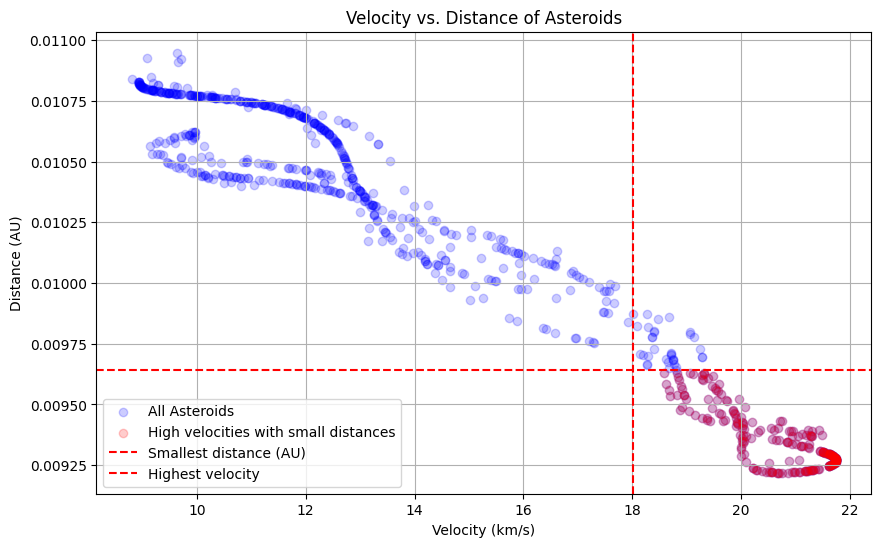

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(unique_asteroids['velocity'], unique_asteroids['distance'], alpha=0.2, label= 'All Asteroids', color="blue")
plt.scatter(high_vel_low_dis['velocity'], high_vel_low_dis['distance'], color='red',alpha=0.2, label='High velocities with small distances')

plt.axhline(y=0.009642, color='r', linestyle='--', label='Smallest distance (AU)')
plt.axvline(x=18.009642, color='r', linestyle='--', label='Highest velocity')

plt.title('Velocity vs. Distance of Asteroids')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Distance (AU)')

plt.legend()
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Scatter(
    x=unique_asteroids['velocity'],
    y=unique_asteroids['distance'],
    mode='markers',
    name='All Asteroids',
    marker=dict(color='orange', size=6),
    text=unique_asteroids['denomination'],
    hovertemplate='<b>%{text}</b><br>Velocity: %{x} km/s<br>Distance: %{y} AU<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=high_vel_low_dis['velocity'],
    y=high_vel_low_dis['distance'],
    mode='markers',
    name='High velocities with small distances',
    marker=dict(color='blue', size=8),
    text=high_vel_low_dis['denomination'],
    hovertemplate='<b>%{text}</b><br>Velocity: %{x} km/s<br>Distance: %{y} AU<extra></extra>'
))

fig.update_layout(
    title='Velocity vs. Distance of Asteroids',
    xaxis_title='Velocity (km/s)',
    yaxis_title='Distance (AU)',
    legend_title='Asteroids',
    template='plotly_white'
)

fig.show()

In [ ]:
asteroids=high_vel_low_dis['denomination']
asteroids

0         aaltje
1            ada
2         aegina
3         aglaja
4       aletheia
         ...    
204    vindobona
205      vundtia
206     watsonia
207      welther
208         yrsa
Name: denomination, Length: 209, dtype: object

#Find which asteroids have high Proper Motion in RA and Dec

proper motion is not found in the dataset

# Visualize the current sky positions of asteroids (especially the ones near the ecliptic plane)


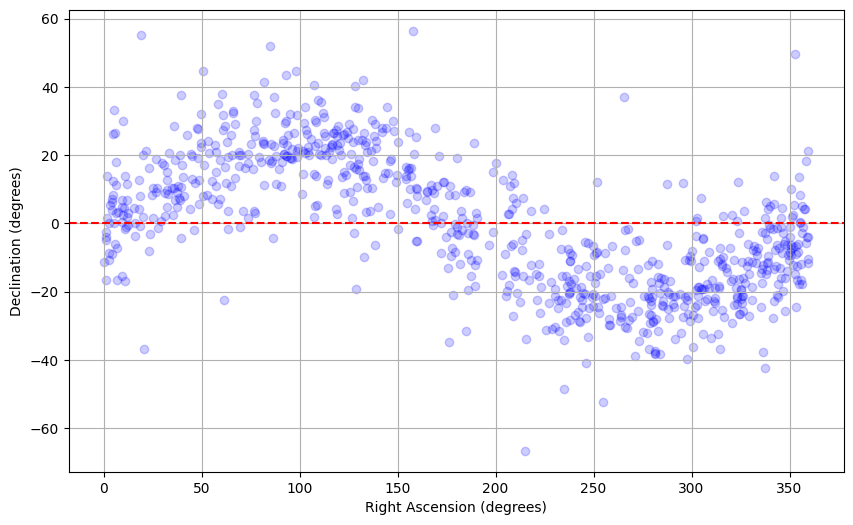

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(unique_asteroids['ra'], unique_asteroids['dec'], color='blue', alpha=0.2)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.axhline(y=0, color='r', linestyle='--', label='Ecliptic Plane = 0')
plt.grid()
plt.show()

Elliptic plane is the declination equal to zero which means

In [ ]:
unique_asteroids.describe()

solution_id     SOURCE_ID    TRANSIT_ID  observation_id  \
count  7.870000e+02  7.870000e+02  7.870000e+02    7.870000e+02   
mean   4.289682e+18 -4.284960e+09  5.865460e+16    5.865460e+17   
std    1.303952e+17  4.876920e+04  1.563773e+16    1.563773e+17   
min    4.167558e+18 -4.284967e+09  1.623433e+16    1.623433e+17   
25%    4.167558e+18 -4.284965e+09  5.056864e+16    5.056864e+17   
50%    4.167558e+18 -4.284963e+09  6.492504e+16    6.492504e+17   
75%    4.428731e+18 -4.284960e+09  7.108297e+16    7.108297e+17   
max    4.428731e+18 -4.283624e+09  7.229803e+16    7.229803e+17   

           number_mp        epoch     epoch_err    epoch_utc          ra  \
count     787.000000   787.000000  7.870000e+02   787.000000  787.000000   
mean      743.435832  2457.582636  1.137500e-08  2457.581617  190.515478   
std      4876.920147   282.800381  7.614901e-23   282.800369  110.780999   
min         1.000000  1690.433577  1.137500e-08  1690.432586    0.034274   
25%       198.500000  2311.352008  1.137500e-08  2311.350996   95.366276   
50%       445.000000  2570.980078  1.137500e-08  2570.979050  188.769700   
75%       757.500000  2682.343258  1.137500e-08  2682.342229  294.541377   
max    134340.000000  2704.317154  1.137500e-08  2704.316124  359.575248   

              dec  ...  x_gaia_geocentric  y_gaia_geocentric  \
count  787.000000  ...         787.000000         787.000000   
mean    -0.443501  ...          -0.002443          -0.000423   
std     19.622229  ...           0.005584           0.007457   
min    -66.597738  ...          -0.009264          -0.009434   
25%    -16.677874  ...          -0.006510          -0.008499   
50%     -1.043031  ...          -0.004107           0.000173   
75%     15.119171  ...           0.001499           0.007664   
max     56.470103  ...           0.009327           0.010150   

       z_gaia_geocentric  vx_gaia_geocentric  vy_gaia_geocentric  \
count         787.000000          787.000000          787.000000   
mean           -0.000242           -0.000005           -0.000043   
std             0.003253            0.000103            0.000123   
min            -0.005470           -0.000156           -0.000234   
25%            -0.003919           -0.000111           -0.000125   
50%             0.001196           -0.000023           -0.000038   
75%             0.003065            0.000101            0.000018   
max             0.003393            0.000144            0.000229   

       vz_gaia_geocentric  position_angle_scan  astrometric_outcome_transit  \
count          787.000000           787.000000                   787.000000   
mean            -0.000026           228.674534                     1.074968   
std              0.000053           109.093755                     0.263508   
min             -0.000112             0.283911                     1.000000   
25%             -0.000068           191.958270                     1.000000   
50%             -0.000044           234.708128                     1.000000   
75%              0.000005           321.810924                     1.000000   
max              0.000111           359.903931                     2.000000   

         velocity    distance  
count  787.000000  787.000000  
mean    14.615025    0.010156  
std      4.317534    0.000555  
min      8.800589    0.009219  
25%     10.916918    0.009601  
50%     13.071812    0.010371  
75%     19.066540    0.010660  
max     21.747078    0.010948  

[8 rows x 35 columns]

In [ ]:
ecliptic_threshold=20
near_ecliptic = unique_asteroids[(unique_asteroids['dec'] >= -ecliptic_threshold) & (unique_asteroids['dec'] <= ecliptic_threshold)]

print(f"Number of asteroids near the ecliptic plane: {len(near_ecliptic)}")
near_ecliptic=near_ecliptic.reset_index(drop=True)

Number of asteroids near the ecliptic plane: 492


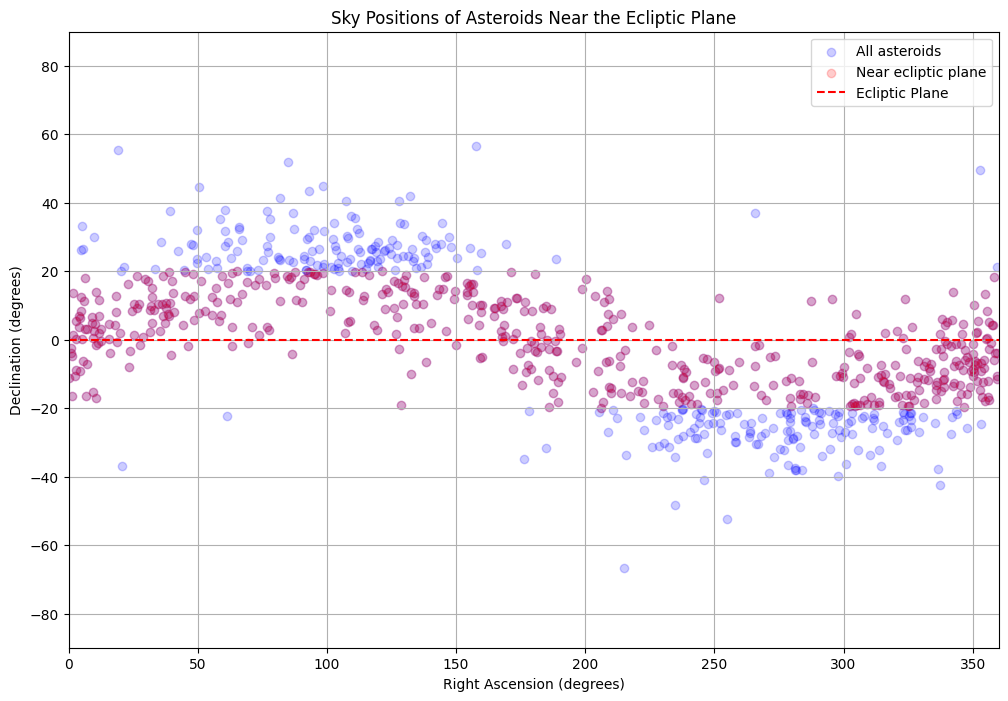

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(unique_asteroids['ra'], unique_asteroids['dec'],alpha=0.2, color='blue',label='All asteroids')
plt.scatter(near_ecliptic['ra'], near_ecliptic['dec'], alpha=0.2,color='red', label='Near ecliptic plane')  # s is the size of points
plt.title('Sky Positions of Asteroids Near the Ecliptic Plane')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.xlim(0, 360)  # RA ranges from 0 to 360 degrees
plt.ylim(-90, 90)  # Dec ranges from -90 to +90 degrees
plt.axhline(0, color='r', linestyle='--', label='Ecliptic Plane')  # Ecliptic line at Dec = 0
plt.grid()
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Scatter(
    x=unique_asteroids['ra'],
    y=unique_asteroids['dec'],
    mode='markers',
    name='All Asteroids',
    marker=dict(color='orange', size=6),
    text=unique_asteroids['denomination'],
    hovertemplate='<b>%{text}</b><br>Right Ascension: %{x} degrees<br>Declination: %{y} degrees<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=near_ecliptic['ra'],
    y=near_ecliptic['dec'],
    mode='markers',
    name='Near Ecliptic Plane',
    marker=dict(color='blue', size=8),
    text=near_ecliptic['denomination'],
    hovertemplate='<b>%{text}</b><br>Right Ascension: %{x} degrees<br>Declination: %{y} degrees<extra></extra>'
))

fig.update_layout(
    title='Sky Positions of Asteroids Near the Ecliptic Plane',
    xaxis_title='Right Ascension (degrees)',
    yaxis_title='Declination (degrees)',
    legend_title='Asteroids',
    template='plotly_white'
)

fig.show()

In [ ]:
asteroid=near_ecliptic['denomination']
asteroid

0          abnoba
1      abundantia
2        adelheid
3        adelinda
4          adeona
          ...    
487         xenia
488          yrsa
489        zachia
490       zelinda
491         zeuxo
Name: denomination, Length: 492, dtype: object

#Find which asteroids have high eccentricities and low inclinations, and plot their values

In [ ]:
common_asteroids.describe()

number_mp     osc_epoch  mean_anomaly  arg_perihelion  \
count   19357.000000  19357.000000  19357.000000    19357.000000   
mean    20910.715348   2202.265382      0.029032       -0.007356   
std     31669.699799     59.344666      1.809595        1.817243   
min         1.000000   1721.000000     -3.140364       -3.141420   
25%      4985.000000   2170.000000     -1.510568       -1.570142   
50%     11520.000000   2200.000000      0.057607       -0.036985   
75%     24438.000000   2226.000000      1.575035        1.579903   
max    366272.000000   2609.000000      3.141340        3.141303   

       long_asc_node   inclination  eccentricity  semi_major_axis  \
count   19357.000000  19357.000000  19357.000000     19357.000000   
mean        2.952133      0.129056      0.138562         2.675148   
std         1.757987      0.101345      0.069819         1.059234   
min         0.000304      0.000387      0.001452         0.642279   
25%         1.502644      0.056081      0.089240         2.339438   
50%         2.833321      0.100933      0.133846         2.578594   
75%         4.309355      0.173405      0.178873         2.909268   
max         6.282964      1.117106      0.889864        67.696102   

       std_dev_semi_major_axis    arc_length  num_observations  
count             1.935700e+04  19357.000000      19357.000000  
mean              1.992772e-06    853.370736        189.300305  
std               1.636444e-04    136.501480         87.274186  
min               1.763292e-10     60.251064         21.000000  
25%               8.816609e-09    781.855755        128.000000  
50%               2.038363e-08    886.928336        172.000000  
75%               4.725068e-08    954.088103        233.000000  
max               2.271010e-02   1026.028280        807.000000

Choosing the maximum value for eccentricity to be the value mean+ std=0.208381

For the lowest inclination, i will consider value mean-std= 0.027711

In [ ]:
ecc_in= common_asteroids[(common_asteroids['eccentricity']>0.208381) & (common_asteroids['inclination']<0.027711)]
ecc_in=ecc_in.reset_index(drop=True)
ecc_in.head()

number_mp denomination  osc_epoch  mean_anomaly  arg_perihelion  \
0       4419    allancook     2225.0     -1.757633       -1.118431   
1       9386       hitomi     2200.0     -0.170099       -3.014167   
2       7414        bosch     2195.0      2.923439       -2.489682   
3       3530       hammel     2251.0     -0.167798        1.329008   
4      58573     serpieri     2108.0     -0.366162       -0.073397   

   long_asc_node  inclination  eccentricity  semi_major_axis  \
0       4.044063     0.007113      0.213846         3.058211   
1       3.512049     0.024764      0.233696         3.187023   
2       2.790825     0.012890      0.221326         3.173195   
3       4.584932     0.020449      0.226898         2.399547   
4       0.284781     0.016661      0.264243         2.358212   

                   orbital_elements_var_covar_matrix  std_dev_semi_major_axis  \
0  [3.6007245684338433e-16, -6.120548450599813e-1...             1.897558e-08   
1  [2.0874702298571155e-15, 5.271186286236464e-16...             4.568884e-08   
2  [4.1597970740050334e-15, -1.2843844905390022e-...             6.449649e-08   
3  [3.686931729218801e-16, 1.417852607724847e-16,...             1.920138e-08   
4  [9.274699756276486e-14, 2.7816096879973277e-14...             3.045439e-07   

                                      h_state_vector  \
0  [2.354027582535261, 2.12571215110869, 0.924796...   
1  [2.4023348309036177, 0.48381245735111883, 0.21...   
2  [-3.8159748622284955, -0.568221690488569, -0.2...   
3  [1.4962371517452027, -1.038546219568368, -0.41...   
4  [1.6492255010281198, -0.6730521999525746, -0.3...   

                     h_state_vector_var_covar_matrix  arc_length  \
0  [1.2864364855237207e-17, -1.0575967093315289e-...  930.384567   
1  [7.351700560170001e-17, -6.49473367151472e-17,...  976.594497   
2  [3.8567437274985268e-16, -5.1376199422860064e-...  870.338406   
3  [9.89402190450812e-17, 1.1307072461418827e-16,...  858.049844   
4  [8.230726165621197e-16, -1.24262980934055e-15,...  262.565584   

   num_observations  
0               154  
1               108  
2               207  
3               196  
4               119

In [ ]:
asteroid=ecc_in['denomination']
asteroid

0         allancook
1            hitomi
2             bosch
3            hammel
4          serpieri
          ...      
82     bystritskaya
83          asphaug
84          aarseth
85    philnicholson
86          sipiera
Name: denomination, Length: 87, dtype: object

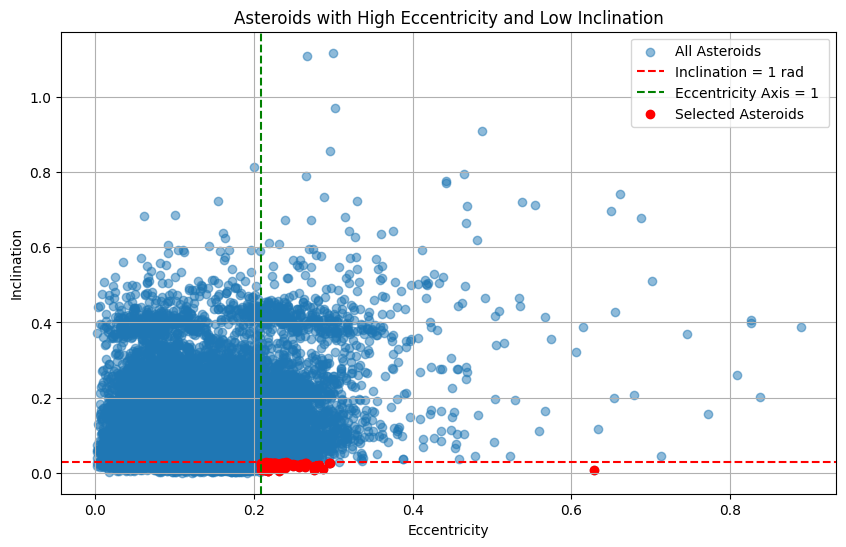

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(common_asteroids['eccentricity'], common_asteroids['inclination'], label='All Asteroids', alpha=0.5)
plt.axhline(y=0.027711, color='r', linestyle='--', label='Inclination = 1 rad')
plt.axvline(x=0.208381, color='g', linestyle='--', label='Eccentricity Axis = 1 ')
plt.scatter(ecc_in['eccentricity'], ecc_in['inclination'], color='red', label='Selected Asteroids')
plt.xlabel('Eccentricity')
plt.ylabel('Inclination')
plt.title('Asteroids with High Eccentricity and Low Inclination')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig=go.Figure()

fig.add_trace(go.Scatter(
    x=common_asteroids['eccentricity'],
    y=common_asteroids['inclination'],
    mode='markers',
    name='All Asteroids',
    marker=dict(color='orange', size=6),
    text=common_asteroids['denomination'],
    hovertemplate='<b>%{text}</b><br>Eccentricity: %{x}<br>Inclination: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=ecc_in['eccentricity'],
    y=ecc_in['inclination'],
    mode='markers',
    name='Selected Asteroids',
    marker=dict(color='blue', size=8),
    text=ecc_in['denomination'],
    hovertemplate='<b>%{text}</b><br>Eccentricity: %{x}<br>Inclination: %{y}<extra></extra>'
))

fig.update_layout(
    title='Asteroids with High Eccentricity and Low Inclination',
    xaxis_title='Eccentricity',
    yaxis_title='Inclination',
    legend_title='Asteroids',
    template='plotly_white'
)

fig.show()

#Find the brightest asteroids (as seen from earth) using apparent magnitude data (G-band)

In [ ]:
unique_asteroids.describe()

solution_id     SOURCE_ID    TRANSIT_ID  observation_id  \
count  7.870000e+02  7.870000e+02  7.870000e+02    7.870000e+02   
mean   4.289682e+18 -4.284960e+09  5.865460e+16    5.865460e+17   
std    1.303952e+17  4.876920e+04  1.563773e+16    1.563773e+17   
min    4.167558e+18 -4.284967e+09  1.623433e+16    1.623433e+17   
25%    4.167558e+18 -4.284965e+09  5.056864e+16    5.056864e+17   
50%    4.167558e+18 -4.284963e+09  6.492504e+16    6.492504e+17   
75%    4.428731e+18 -4.284960e+09  7.108297e+16    7.108297e+17   
max    4.428731e+18 -4.283624e+09  7.229803e+16    7.229803e+17   

           number_mp        epoch     epoch_err    epoch_utc          ra  \
count     787.000000   787.000000  7.870000e+02   787.000000  787.000000   
mean      743.435832  2457.582636  1.137500e-08  2457.581617  190.515478   
std      4876.920147   282.800381  7.614901e-23   282.800369  110.780999   
min         1.000000  1690.433577  1.137500e-08  1690.432586    0.034274   
25%       198.500000  2311.352008  1.137500e-08  2311.350996   95.366276   
50%       445.000000  2570.980078  1.137500e-08  2570.979050  188.769700   
75%       757.500000  2682.343258  1.137500e-08  2682.342229  294.541377   
max    134340.000000  2704.317154  1.137500e-08  2704.316124  359.575248   

              dec  ...  x_gaia_geocentric  y_gaia_geocentric  \
count  787.000000  ...         787.000000         787.000000   
mean    -0.443501  ...          -0.002443          -0.000423   
std     19.622229  ...           0.005584           0.007457   
min    -66.597738  ...          -0.009264          -0.009434   
25%    -16.677874  ...          -0.006510          -0.008499   
50%     -1.043031  ...          -0.004107           0.000173   
75%     15.119171  ...           0.001499           0.007664   
max     56.470103  ...           0.009327           0.010150   

       z_gaia_geocentric  vx_gaia_geocentric  vy_gaia_geocentric  \
count         787.000000          787.000000          787.000000   
mean           -0.000242           -0.000005           -0.000043   
std             0.003253            0.000103            0.000123   
min            -0.005470           -0.000156           -0.000234   
25%            -0.003919           -0.000111           -0.000125   
50%             0.001196           -0.000023           -0.000038   
75%             0.003065            0.000101            0.000018   
max             0.003393            0.000144            0.000229   

       vz_gaia_geocentric  position_angle_scan  astrometric_outcome_transit  \
count          787.000000           787.000000                   787.000000   
mean            -0.000026           228.674534                     1.074968   
std              0.000053           109.093755                     0.263508   
min             -0.000112             0.283911                     1.000000   
25%             -0.000068           191.958270                     1.000000   
50%             -0.000044           234.708128                     1.000000   
75%              0.000005           321.810924                     1.000000   
max              0.000111           359.903931                     2.000000   

         velocity    distance  
count  787.000000  787.000000  
mean    14.615025    0.010156  
std      4.317534    0.000555  
min      8.800589    0.009219  
25%     10.916918    0.009601  
50%     13.071812    0.010371  
75%     19.066540    0.010660  
max     21.747078    0.010948  

[8 rows x 35 columns]

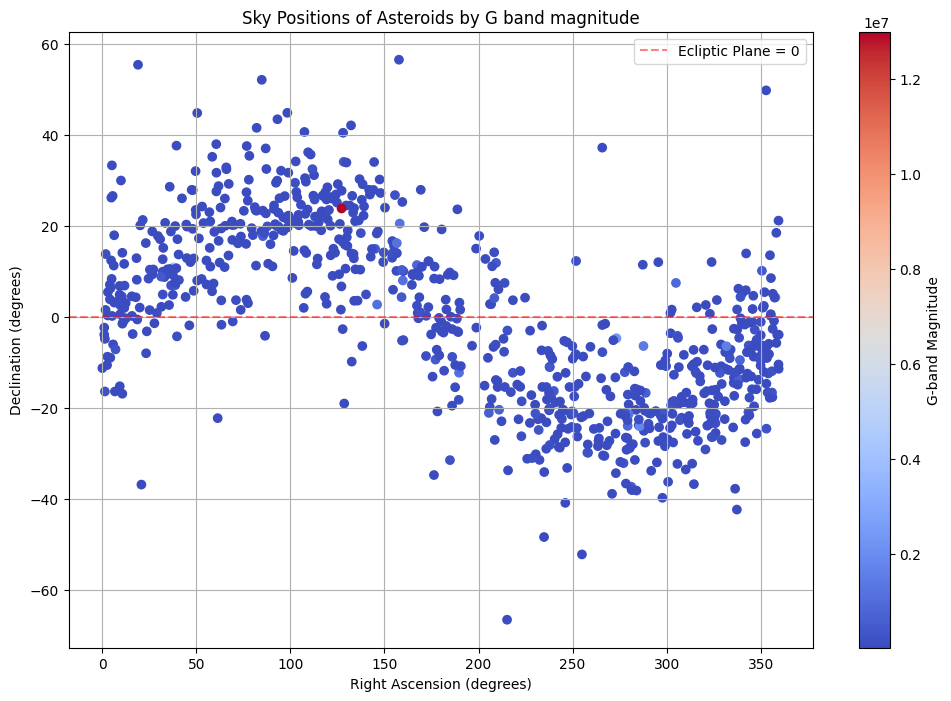

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, figsize=(12,8))
#plt.scatter(unique_asteroids['ra'], unique_asteroids['dec'], color='grey', alpha=0.2)
plt.scatter(unique_asteroids['ra'], unique_asteroids['dec'], c=unique_asteroids['g_flux'], cmap='coolwarm')
#ax.set_aspect('equal')

plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Sky Positions of Asteroids by G band magnitude')
plt.axhline(y=0, color='r', linestyle='--', label='Ecliptic Plane = 0', alpha=0.5)
plt.colorbar(label='G-band Magnitude')
plt.legend()
plt.grid()
plt.show()

In [ ]:
brightest_asteroids2 = unique_asteroids[unique_asteroids['g_flux'] > 700000]
brightest_asteroids2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 45 to 756
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   solution_id                    18 non-null     int64  
 1   SOURCE_ID                      18 non-null     int64  
 2   denomination                   18 non-null     object 
 3   TRANSIT_ID                     18 non-null     int64  
 4   observation_id                 18 non-null     int64  
 5   number_mp                      18 non-null     int64  
 6   epoch                          18 non-null     float64
 7   epoch_err                      18 non-null     float64
 8   epoch_utc                      18 non-null     float64
 9   ra                             18 non-null     float64
 10  dec                            18 non-null     float64
 11  ra_error_systematic            18 non-null     float64
 12  dec_error_systematic           18 non-null     float64


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Plot all asteroids
fig.add_trace(go.Scatter(
    x=unique_asteroids['ra'],
    y=unique_asteroids['dec'],
    mode='markers',
    name='All Asteroids',
    marker=dict(color='orange', size=6),
    text=unique_asteroids['denomination'],
    hovertext=unique_asteroids['g_flux'],
    hovertemplate='<b>%{text}</b><br>G Flux: %{hovertext}<extra></extra>'
))

# Plot brightest asteroids
fig.add_trace(go.Scatter(
    x=brightest_asteroids2['ra'],
    y=brightest_asteroids2['dec'],
    mode='markers',
    name='Brightest Asteroids',
    marker=dict(color='blue', size=8),
    text=brightest_asteroids2['denomination'],
    hovertext=brightest_asteroids2['g_flux'],
    hovertemplate='<b>%{text}</b><br>G Flux: %{hovertext}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Sky Positions of Asteroids by G Band Magnitude',
    xaxis_title='Right Ascension (degrees)',
    yaxis_title='Declination (degrees)',
    legend_title='Asteroids',
    template='plotly_white'
)

# Show the plot
fig.show()


#Compare how bright asteroids appear at different distances from the Earth or Sun.

Getting three distinct distances from the distance column, going too get the lowest, median and highest one and compare the features of these in a column, you can use graphs to visualise it.

In [ ]:
unique_asteroids.describe()

solution_id     SOURCE_ID    TRANSIT_ID  observation_id  \
count  1.750000e+02  1.750000e+02  1.750000e+02    1.750000e+02   
mean   4.425747e+18 -4.284116e+09  3.731318e+16    3.731318e+17   
std    2.784028e+16  6.798073e+05  1.240431e+16    1.240431e+17   
min    4.167558e+18 -4.284962e+09  1.598794e+16    1.598794e+17   
25%    4.428731e+18 -4.284612e+09  2.245736e+16    2.245736e+17   
50%    4.428731e+18 -4.284249e+09  3.638020e+16    3.638020e+17   
75%    4.428731e+18 -4.283776e+09  4.889994e+16    4.889994e+17   
max    4.428731e+18 -4.281801e+09  6.005053e+16    6.005053e+17   

           number_mp        epoch     epoch_err    epoch_utc          ra  \
count     175.000000   175.000000  1.750000e+02   175.000000  175.000000   
mean    85156.840000  2071.633807  1.137500e-08  2071.632803  185.446797   
std     67980.733349   224.325541  3.318217e-23   224.325532  103.390938   
min       577.000000  1685.977853  1.137500e-08  1685.976863    2.642152   
25%     35517.000000  1802.973841  1.137500e-08  1802.972849  126.708604   
50%     71877.000000  2054.761471  1.137500e-08  2054.760463  144.540698   
75%    119087.000000  2281.174270  1.137500e-08  2281.173259  306.151098   
max    316597.000000  2482.827262  1.137500e-08  2482.826247  335.816800   

              dec  ...  x_gaia_geocentric  y_gaia_geocentric  \
count  175.000000  ...         175.000000         175.000000   
mean     0.900638  ...          -0.000707          -0.000339   
std     19.585034  ...           0.005761           0.007796   
min    -44.273154  ...          -0.008954          -0.009461   
25%    -18.215816  ...          -0.008937          -0.007065   
50%     -0.150869  ...           0.000809          -0.002951   
75%     18.115967  ...           0.000891           0.009975   
max     44.988873  ...           0.008218           0.010075   

       z_gaia_geocentric  vx_gaia_geocentric  vy_gaia_geocentric  \
count         175.000000          175.000000          175.000000   
mean           -0.000353            0.000013           -0.000023   
std             0.003041            0.000108            0.000119   
min            -0.005475           -0.000132           -0.000205   
25%            -0.002812           -0.000131           -0.000203   
50%            -0.000119            0.000056            0.000024   
75%             0.003110            0.000110            0.000027   
max             0.003169            0.000144            0.000189   

       vz_gaia_geocentric  position_angle_scan  astrometric_outcome_transit  \
count          175.000000           175.000000                   175.000000   
mean            -0.000011           150.030094                     1.034286   
std              0.000069           108.146854                     0.182484   
min             -0.000104             8.314239                     1.000000   
25%             -0.000104            52.384460                     1.000000   
50%             -0.000008           168.093767                     1.000000   
75%              0.000003           210.282636                     1.000000   
max              0.000090           333.284168                     2.000000   

         velocity    distance  
count  175.000000  175.000000  
mean    14.764725    0.010154  
std      3.980274    0.000512  
min      9.556230    0.009419  
25%     11.556211    0.009423  
50%     15.542784    0.010114  
75%     20.322813    0.010488  
max     20.390607    0.010931  

[8 rows x 35 columns]

* Smallest distance- 0.009419

* Medium distance- 0.010175

* Largest distance- 0.010931

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
least_rows = unique_asteroids.nsmallest(1, 'distance')
least_rows.head()

solution_id   SOURCE_ID denomination         TRANSIT_ID  \
112  4428731357481467921 -4284182126    2002 rw92  48890594846102478   

         observation_id  number_mp        epoch     epoch_err   epoch_utc  \
112  488905948461024785      78517  2281.005321  1.137500e-08  2281.00431   

             ra        dec  ra_error_systematic  dec_error_systematic  \
112  312.161353 -19.731009             1.392728              1.830908   

     ra_dec_correlation_systematic  ra_error_random  dec_error_random  \
112                       0.998944       370.780522        487.524741   

     ra_dec_correlation_random      g_mag      g_flux  g_flux_error    x_gaia  \
112                   0.999629  20.613259  107.063945       6.77419 -0.987489   

       y_gaia    z_gaia   vx_gaia   vy_gaia   vz_gaia  x_gaia_geocentric  \
112 -0.167886 -0.071793  0.002901 -0.015779 -0.006855          -0.008954   

     y_gaia_geocentric  z_gaia_geocentric  vx_gaia_geocentric  \
112          -0.002923          -0.000105            0.000055   

     vy_gaia_geocentric  vz_gaia_geocentric  position_angle_scan  \
112           -0.000205           -0.000104           127.251591   

                  astrometric_outcome_ccd  astrometric_outcome_transit  \
112  [12, 35, 1, 1, 1, 1, 11, 11, 11, 35]                            1   

      velocity  distance  
112  20.390607  0.009419

In [ ]:
max_rows = unique_asteroids.nlargest(1, 'distance')
max_rows.head()

solution_id   SOURCE_ID denomination         TRANSIT_ID  \
22  4428731357481467921 -4284407126     1998 vc4  53584043036276337   

        observation_id  number_mp        epoch     epoch_err    epoch_utc  \
22  535840430362763379      56017  2365.884168  1.137500e-08  2365.883155   

            ra        dec  ra_error_systematic  dec_error_systematic  \
22  319.801317 -14.111841             2.257809              0.440699   

    ra_dec_correlation_systematic  ra_error_random  dec_error_random  \
22                       0.993042       601.248328        116.718416   

    ra_dec_correlation_random      g_mag     g_flux  g_flux_error    x_gaia  \
22                   0.998905  19.868336  212.62401      8.358502  0.049465   

      y_gaia    z_gaia   vx_gaia   vy_gaia   vz_gaia  x_gaia_geocentric  \
22 -0.938602 -0.408445  0.017011  0.000661  0.000287          -0.000073   

    y_gaia_geocentric  z_gaia_geocentric  vx_gaia_geocentric  \
22          -0.009461          -0.005475             0.00011   

    vy_gaia_geocentric  vz_gaia_geocentric  position_angle_scan  \
22            0.000007            0.000003           169.024886   

            astrometric_outcome_ccd  astrometric_outcome_transit  velocity  \
22  [12, 1, 1, 1, 1, 1, 1, 1, 1, 1]                            1  9.564982   

    distance  
22  0.010931

In [ ]:
median_distance = unique_asteroids['distance'].median()
median_rows = unique_asteroids[unique_asteroids['distance'] >= median_distance]
median_rows.head()

solution_id   SOURCE_ID denomination         TRANSIT_ID  \
0  4428731357481467921 -4284005726     1978 uv4  22425385532704651   
2  4428731357481467921 -4284385726     1989 gc3  22439041246470834   
4  4428731357481467921 -4284800926     1993 qp2  22439237690757244   
6  4428731357481467921 -4284309726      1994 fv  53589169986515836   
7  4428731357481467921 -4284755326     1994 ps7  22446157939401105   

       observation_id  number_mp        epoch     epoch_err    epoch_utc  \
0  224253855327046518      96157  1802.395651  1.137500e-08  1802.394658   
2  224390412464708349      58157  1802.642663  1.137500e-08  1802.641671   
4  224392376907572449      16637  1802.646216  1.137500e-08  1802.645224   
6  535891699865158369      65757  2365.976886  1.137500e-08  2365.975873   
7  224461579394011059      21197  1802.771365  1.137500e-08  1802.770373   

           ra        dec  ra_error_systematic  dec_error_systematic  \
0  304.491520 -18.429436             2.038784              1.065493   
2  307.199052 -22.307566             2.003306              1.130788   
4  304.503005 -17.865922             2.020577              1.099631   
6  326.841436 -40.331023             2.232916              0.553177   
7  124.814822  17.592098             2.009352              1.120009   

   ra_dec_correlation_systematic  ra_error_random  dec_error_random  \
0                       0.998544       542.906362        283.595873   
2                       0.998661       533.453662        300.986032   
4                       0.998609       538.042902        292.611480   
6                       0.995491       594.615199        146.731858   
7                      -0.998644       535.049866        298.030136   

   ra_dec_correlation_random      g_mag      g_flux  g_flux_error    x_gaia  \
0                   0.999367  20.548447  113.649612      6.699578  0.241988   
2                   0.999480  20.460749  123.210309      5.761130  0.237763   
4                   0.999866  19.296865  359.915642      7.118249  0.237702   
6                   0.999914  19.353804  341.527003      4.661926  0.051042   
7                  -0.999953  19.455436  311.008614      5.716833  0.235560   

     y_gaia    z_gaia   vx_gaia   vy_gaia   vz_gaia  x_gaia_geocentric  \
0  0.886049  0.382762 -0.017094  0.003792  0.001625           0.000891   
2  0.886977  0.383160 -0.017112  0.003724  0.001596           0.000858   
4  0.886990  0.383166 -0.017112  0.003723  0.001595           0.000858   
6 -0.938540 -0.408418  0.017010  0.000686  0.000298          -0.000063   
7  0.887454  0.383364 -0.017121  0.003689  0.001581           0.000842   

   y_gaia_geocentric  z_gaia_geocentric  vx_gaia_geocentric  \
0           0.009969           0.003114           -0.000132   
2           0.009975           0.003112           -0.000132   
4           0.009975           0.003112           -0.000132   
6          -0.009460          -0.005475            0.000110   
7           0.009979           0.003111           -0.000131   

   vy_gaia_geocentric  vz_gaia_geocentric  position_angle_scan  \
0            0.000027           -0.000008           332.427462   
2            0.000026           -0.000008           330.573964   
4            0.000026           -0.000008           331.462446   
6            0.000007            0.000003           166.139200   
7            0.000025           -0.000008           209.117810   

            astrometric_outcome_ccd  astrometric_outcome_transit   velocity  \
0  [12, 1, 1, 1, 1, 1, 1, 1, 1, 11]                            1  11.655670   
2   [11, 1, 1, 1, 1, 1, 1, 1, 1, 1]                            1  11.607076   
4  [12, 1, 1, 1, 1, 32, 1, 1, 1, 1]                            1  11.606370   
6  [12, 1, 1, 1, 35, 1, 1, 1, 1, 1]                            1   9.561151   
7   [12, 1, 1, 1, 1, 1, 1, 1, 1, 1]                            1  11.581372   

   distance  
0  0.010482  
2  0.010485  
4  0.010485  
6  0.010930  
7  0.010486

*   We can notice a larger variation in the declination of the asteroid and the calculated velocity to be inversely proportional when compared with their distances.



*   There is direct proportion to the g_flux which describes the brightness of asteroids, so the least distance has low g_flux which is true for maximum distance and high g_flux.







#Plot the positions of asteroids closest to the earth

First convert the orbital elements to the cartisian values(x,y,z)- directly use h_state_vector it contains the x y z heliocentric cartesian values.

In [ ]:
neo1=neo.drop(columns=['orbital_elements_var_covar_matrix','h_state_vector','h_state_vector_var_covar_matrix'])

In [ ]:
ecc_in1=ecc_in.drop(columns=['orbital_elements_var_covar_matrix','h_state_vector','h_state_vector_var_covar_matrix'])

The other subsets of tables are from sso_observations- near_elliptic and combined_asteroids,so the tables i have combined are containing the asteroids which are calculated to be near earth orbit and having high eccentricities and low inclinations

In [ ]:
combined_df = pd.merge(neo1, ecc_in1, how='outer')
combined_df.head()

number_mp denomination  osc_epoch  mean_anomaly  arg_perihelion  \
0          1        ceres     2163.0      3.016677        1.269078   
1          2       pallas     2193.0      2.818199       -0.872874   
2          3         juno     2202.0      2.150951       -1.949629   
3          4        vesta     2199.0      2.241741        2.637870   
4          5      astraea     2228.0      0.028512       -0.018452   

   long_asc_node  inclination  eccentricity  semi_major_axis  \
0       1.401907     0.184861      0.075762         2.768088   
1       3.020963     0.608088      0.231034         2.772335   
2       2.964659     0.226716      0.256264         2.669769   
3       1.812456     0.124617      0.088919         2.361678   
4       2.471314     0.093697      0.191438         2.574296   

   std_dev_semi_major_axis  arc_length  num_observations  
0             6.928210e-08  628.952479                43  
1             1.657514e-08  732.189678               110  
2             1.314736e-08  792.832918               129  
3             9.911536e-09  799.149970                79  
4             1.317080e-09  916.191947               181

I can try filtering this dataset with columns that are only present in other tables, and then reduce the columns to one final table.

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19350 entries, 0 to 19349
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_mp                19350 non-null  int32  
 1   denomination             19350 non-null  object 
 2   osc_epoch                19350 non-null  float64
 3   mean_anomaly             19350 non-null  float64
 4   arg_perihelion           19350 non-null  float64
 5   long_asc_node            19350 non-null  float64
 6   inclination              19350 non-null  float64
 7   eccentricity             19350 non-null  float64
 8   semi_major_axis          19350 non-null  float64
 9   std_dev_semi_major_axis  19350 non-null  float64
 10  arc_length               19350 non-null  float64
 11  num_observations         19350 non-null  int32  
dtypes: float64(9), int32(2), object(1)
memory usage: 1.6+ MB


In [ ]:
combined_df.describe()

number_mp     osc_epoch  mean_anomaly  arg_perihelion  \
count   19350.000000  19350.000000  19350.000000    19350.000000   
mean    20905.518501   2202.252300      0.029194       -0.007313   
std     31655.841073     59.348837      1.809687        1.817292   
min         1.000000   1721.000000     -3.140364       -3.141420   
25%      4987.250000   2170.000000     -1.510793       -1.570118   
50%     11522.500000   2200.000000      0.057665       -0.037373   
75%     24437.000000   2226.000000      1.575464        1.580027   
max    366272.000000   2609.000000      3.141340        3.141303   

       long_asc_node   inclination  eccentricity  semi_major_axis  \
count   19350.000000  19350.000000  19350.000000     19350.000000   
mean        2.952144      0.128930      0.138471         2.675801   
std         1.758020      0.101078      0.069604         1.058867   
min         0.000304      0.000387      0.001452         1.006938   
25%         1.502326      0.056075      0.089232         2.339516   
50%         2.833420      0.100910      0.133831         2.578713   
75%         4.310090      0.173349      0.178804         2.909358   
max         6.282964      1.117106      0.889864        67.696102   

       std_dev_semi_major_axis    arc_length  num_observations  
count             1.935000e+04  19350.000000      19350.000000  
mean              1.993486e-06    853.423968        189.335969  
std               1.636740e-04    136.453199         87.264608  
min               1.763292e-10     60.251064         21.000000  
25%               8.820548e-09    781.931033        128.000000  
50%               2.038988e-08    886.963748        172.000000  
75%               4.726462e-08    954.093568        233.000000  
max               2.271010e-02   1026.028280        807.000000

In [ ]:
def orbital_elements_to_cartesian(a, e, i, Omega, omega, M):
    # Convert orbital elements to Cartesian coordinates
    # Mean anomaly to eccentric anomaly
    E = M + (e * np.sin(M))  # Simplified for small e
    x = a * (np.cos(E) - e)
    y = a * np.sqrt(1 - e**2) * np.sin(E)

    # Rotate to account for inclination and node
    x_rot = x * (np.cos(Omega) * np.cos(omega) - np.sin(Omega) * np.sin(omega) * np.cos(i))
    y_rot = y * (np.cos(omega) * np.sin(i))

    return np.array([x_rot, y_rot])

def calculate_moid(a1, e1, i1, Omega1, omega1, M1,
                   a2, e2, i2, Omega2, omega2, M2):
    # Get Cartesian coordinates for both orbits
    pos1 = orbital_elements_to_cartesian(a1, e1, i1, Omega1, omega1, M1)
    pos2 = orbital_elements_to_cartesian(a2, e2, i2, Omega2, omega2, M2)

    # Calculate the distance between the two positions
    distance = np.linalg.norm(pos1 - pos2)

    return distance,pos1,pos2

In [ ]:
moid_results = []
for n in range(0,19350):
  a1 = combined_df.iloc[n]['semi_major_axis']  # Semi-major axis for body 1 in AU
  e1 = combined_df.iloc[n]['eccentricity']  # Eccentricity for body 1
  i1 = np.radians(combined_df.iloc[n]['inclination'])  # Inclination in radians
  Omega1 = np.radians(combined_df.iloc[n]['long_asc_node'])  # Longitude of ascending node in radians
  omega1 = np.radians(combined_df.iloc[n]['arg_perihelion'])  # Argument of perihelion in radians
  M1 = np.radians(combined_df.iloc[n]['mean_anomaly'])  # Mean anomaly in radians

  a2 = 1.0000010178	  # Semi-major axis for earth in AU (example value)
  e2 = 0.0167086	 # Eccentricity for body 2 (example value)
  i2 = np.radians(7.155)  # Inclination for body 2 in radians (example value)
  Omega2 = np.radians(174.9)  # Longitude of ascending node for body 2 in radians (example value)
  omega2 = np.radians(288.1)  # Argument of perihelion for body 2 in radians (example value)
  M2 = np.radians(5.15)  # Mean anomaly for body 2 in radians (example value)

  moid_distance,pos1,pos2 = calculate_moid(a1, e1, i1, Omega1, omega1, M1,
                                  a2, e2, i2, Omega2, omega2, M2)

  if moid_distance < 1:
      asteroid_name = combined_df.iloc[n]['denomination']
      print(f"Asteroid: {asteroid_name}, Minimum Orbital Intersection Distance (MOID): {moid_distance} AU")
      moid_results.append((moid_distance, pos1, pos2, asteroid_name))

Asteroid: icarus, Minimum Orbital Intersection Distance (MOID): 0.4056871633776119 AU
Asteroid: toro, Minimum Orbital Intersection Distance (MOID): 0.9862297690756506 AU
Asteroid: apollo, Minimum Orbital Intersection Distance (MOID): 0.8666073417628465 AU
Asteroid: daedalus, Minimum Orbital Intersection Distance (MOID): 0.7829762333445979 AU
Asteroid: cerberus, Minimum Orbital Intersection Distance (MOID): 0.7925329664275258 AU
Asteroid: midas, Minimum Orbital Intersection Distance (MOID): 0.8402121223876565 AU
Asteroid: bacchus, Minimum Orbital Intersection Distance (MOID): 0.9202085065780528 AU
Asteroid: oljato, Minimum Orbital Intersection Distance (MOID): 0.8436668600983657 AU
Asteroid: hephaistos, Minimum Orbital Intersection Distance (MOID): 0.5673695699130586 AU
Asteroid: phaethon, Minimum Orbital Intersection Distance (MOID): 0.3539418002341824 AU
Asteroid: syrinx, Minimum Orbital Intersection Distance (MOID): 0.846055524887833 AU
Asteroid: epona, Minimum Orbital Intersection D

In [ ]:
top_least_moids = sorted(moid_results, key=lambda x: x[0])[:21]  # Plotting the selected orbits
moid_df_earth = pd.DataFrame(top_least_moids, columns=['MOID', 'Position1', 'Position2', 'Asteroid_Name'])
moid_df_earth.head()

MOID                                      Position1  \
0  0.353942  [0.13302168911003753, -0.0004017900706318736]   
1  0.405687  [0.18477552582915996, 0.00023665941336494314]   
2  0.407901  [0.18698746286724874, -9.778118932063515e-06]   
3  0.454324   [0.23341371137910835, 0.0002749968748406986]   
4  0.567370  [0.3464586841517638, -0.00025378209456055565]   

                                       Position2 Asteroid_Name  
0  [-0.22089826330997936, 0.0035307958504707903]      phaethon  
1  [-0.22089826330997936, 0.0035307958504707903]        icarus  
2  [-0.22089826330997936, 0.0035307958504707903]         talos  
3  [-0.22089826330997936, 0.0035307958504707903]       tjelvar  
4  [-0.22089826330997936, 0.0035307958504707903]    hephaistos

In [ ]:
import plotly.graph_objects as go

asteroid_name= combined_df[combined_df['denomination'].isin(moid_df_earth['Asteroid_Name'])]['denomination']
asteroid_semi_major_axes = combined_df[combined_df['denomination'].isin(moid_df_earth['Asteroid_Name'])]['semi_major_axis']
asteroid_inclinations = combined_df[combined_df['denomination'].isin(moid_df_earth['Asteroid_Name'])]['inclination']

earth_semi_major_axis = 1.0000010178  # in AU
earth_inclination = 7.155  # in degrees

# Initialize the figure
fig = go.Figure()

# Plot asteroids with hover info for denomination
fig.add_trace(go.Scatter(
    x=asteroid_semi_major_axes,
    y=asteroid_inclinations,
    mode='markers',
    name='Asteroids with MOID < 1 AU',
    marker=dict(color='orange', size=6),
    text=asteroid_name,  # Display asteroid names on hover
    hovertemplate='<b>%{text}</b><br>Semi-Major Axis: %{x} AU<br>Inclination: %{y}°<extra></extra>'
))

# Plot Earth
fig.add_trace(go.Scatter(
    x=[earth_semi_major_axis],
    y=[earth_inclination],
    mode='markers',
    name='Earth',
    marker=dict(color='green', size=12),
    hovertemplate='<b>Earth</b><br>Semi-Major Axis: %{x} AU<br>Inclination: %{y}°<extra></extra>'
))

# Update layout with labels and title
fig.update_layout(
    title='Positions of Asteroids and Earth Based on Semi-Major Axis and Inclination',
    xaxis_title='Semi-Major Axis (AU)',
    yaxis_title='Inclination (Degrees)',
    legend_title='Celestial Objects',
    template='plotly_white'
)

# Show the interactive plot
fig.show()


In [ ]:
for moid_distance, pos1, pos2, asteroid_name in top_least_moids:
    plt.figure(figsize=(10, 10))

    plt.scatter(pos1[0], pos1[1], color='blue', label='Body 1 Position')
    plt.scatter(pos2[0], pos2[1], color='orange', label='Earth Position')

    theta = np.linspace(0, 2 * np.pi, 100)

    x_orbit_1 = a1 * (np.cos(theta) - e1)
    y_orbit_1 = a1 * np.sqrt(1 - e1**2) * np.sin(theta)

    x_orbit_2 = a2 * (np.cos(theta) - e2)
    y_orbit_2 = a2 * np.sqrt(1 - e2**2) * np.sin(theta)

    plt.plot(x_orbit_1, y_orbit_1, color='blue', alpha=0.5)
    plt.plot(x_orbit_2 + pos2[0], y_orbit_2 + pos2[1], color='orange', alpha=0.5)

    plt.title(f'Positions of Two Orbits\nAsteroid: {asteroid_name}, MOID: {moid_distance:.5f} AU')
    plt.xlabel('X Position (AU)')
    plt.ylabel('Y Position (AU)')

    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)

    plt.grid()
    plt.legend()
    plt.axis('equal')

    plt.show()

#Plot the positions of asteroids near the sun

In [ ]:
moid_results1 = []
for n in range(0,19350):
  a1 = combined_df.iloc[n]['semi_major_axis']  # Semi-major axis for body 1 in AU
  e1 = combined_df.iloc[n]['eccentricity']  # Eccentricity for body 1
  i1 = np.radians(combined_df.iloc[n]['inclination'])  # Inclination in radians
  Omega1 = np.radians(combined_df.iloc[n]['long_asc_node'])  # Longitude of ascending node in radians
  omega1 = np.radians(combined_df.iloc[n]['arg_perihelion'])  # Argument of perihelion in radians
  M1 = np.radians(combined_df.iloc[n]['mean_anomaly'])  # Mean anomaly in radians

  a2 = 0.0	  # Semi-major axis for earth in AU (example value)
  e2 = 0.01	 # Eccentricity for body 2 (example value)
  i2 = np.radians(0.0)  # Inclination for body 2 in radians (example value)
  Omega2 = np.radians(0.0)  # Longitude of ascending node for body 2 in radians (example value)
  omega2 = np.radians(0.0)  # Argument of perihelion for body 2 in radians (example value)
  M2 = np.radians(0.0)  # Mean anomaly for body 2 in radians (example value)

  moid_distance,pos1,pos2 = calculate_moid(a1, e1, i1, Omega1, omega1, M1,
                                  a2, e2, i2, Omega2, omega2, M2)

  if moid_distance < 1:
      asteroid_name = combined_df.iloc[n]['denomination']
      print(f"Asteroid: {asteroid_name}, Minimum Orbital Intersection Distance from Sun (MOID): {moid_distance} AU")
      moid_results1.append((moid_distance, pos1, pos2, asteroid_name))

Asteroid: icarus, Minimum Orbital Intersection Distance from Sun (MOID): 0.18477567738509443 AU
Asteroid: geographos, Minimum Orbital Intersection Distance from Sun (MOID): 0.823346401176069 AU
Asteroid: toro, Minimum Orbital Intersection Distance from Sun (MOID): 0.7653254481365669 AU
Asteroid: apollo, Minimum Orbital Intersection Distance from Sun (MOID): 0.6457014820959162 AU
Asteroid: antinous, Minimum Orbital Intersection Distance from Sun (MOID): 0.8871166877453933 AU
Asteroid: daedalus, Minimum Orbital Intersection Distance from Sun (MOID): 0.5620710874780306 AU
Asteroid: cerberus, Minimum Orbital Intersection Distance from Sun (MOID): 0.5716284861568947 AU
Asteroid: sisyphus, Minimum Orbital Intersection Distance from Sun (MOID): 0.8674281219693125 AU
Asteroid: midas, Minimum Orbital Intersection Distance from Sun (MOID): 0.6193052056667637 AU
Asteroid: bacchus, Minimum Orbital Intersection Distance from Sun (MOID): 0.6993028269150098 AU
Asteroid: tantalus, Minimum Orbital Inte

In [ ]:
top_least_moids = sorted(moid_results1, key=lambda x: x[0])[:-1]  # Plotting the selected orbits
moid_df_sun = pd.DataFrame(top_least_moids, columns=['MOID', 'Position1', 'Position2', 'Asteroid_Name'])
moid_df_sun.head()

MOID                                      Position1   Position2  \
0  0.133022  [0.13302168911003753, -0.0004017900706318736]  [0.0, 0.0]   
1  0.184776  [0.18477552582915996, 0.00023665941336494314]  [0.0, 0.0]   
2  0.186987  [0.18698746286724874, -9.778118932063515e-06]  [0.0, 0.0]   
3  0.233414   [0.23341371137910835, 0.0002749968748406986]  [0.0, 0.0]   
4  0.346459  [0.3464586841517638, -0.00025378209456055565]  [0.0, 0.0]   

  Asteroid_Name  
0      phaethon  
1        icarus  
2         talos  
3       tjelvar  
4    hephaistos

In [ ]:
import plotly.graph_objects as go

asteroid_name= combined_df[combined_df['denomination'].isin(moid_df_sun['Asteroid_Name'])]['denomination']
asteroid_semi_major_axes = combined_df[combined_df['denomination'].isin(moid_df_sun['Asteroid_Name'])]['semi_major_axis']
asteroid_inclinations = combined_df[combined_df['denomination'].isin(moid_df_sun['Asteroid_Name'])]['inclination']

sun_semi_major_axis = 0.0  # in AU
sun_inclination = 0.0  # in degrees

# Initialize the figure
fig = go.Figure()

# Plot asteroids with hover info for denomination
fig.add_trace(go.Scatter(
    x=asteroid_semi_major_axes,
    y=asteroid_inclinations,
    mode='markers',
    name='Asteroids with MOID < 1 AU',
    marker=dict(color='blue', size=6),
    text=asteroid_name,  # Display asteroid names on hover
    hovertemplate='<b>%{text}</b><br>Semi-Major Axis: %{x} AU<br>Inclination: %{y}°<extra></extra>'
))

# Plot Sun
fig.add_trace(go.Scatter(
    x=[sun_semi_major_axis],
    y=[sun_inclination],
    mode='markers',
    name='Sun',
    marker=dict(color='orange', size=12),
    hovertemplate='<b>Sun</b><br>Semi-Major Axis: %{x} AU<br>Inclination: %{y}°<extra></extra>'
))

# Update layout with labels and title
fig.update_layout(
    title='Positions of Asteroids and the Sun Based on Semi-Major Axis and Inclination',
    xaxis_title='Semi-Major Axis (AU)',
    yaxis_title='Inclination (Degrees)',
    legend_title='Celestial Objects',
    template='plotly_white'
)

# Show the interactive plot
fig.show()

# Orbits of asteroids closest to earth

In [ ]:
def make_kepler_orbit(eccentricity, semi_major_axis):
    ##########################################################
    # Units: semi_major_axis [au]                          #
    # Returns: 500 true anomaly values throughout the orbit  #
    ##########################################################
    # Calculate the orbital period using Kepler's Third Law
    orbital_period = np.sqrt(semi_major_axis**3)

    nStep = 500
    tRange = np.linspace(0.0, orbital_period, nStep)

    theta = []
    for time in tRange:
        PsiDiff = 1.0
        M = 2 * np.pi * time / orbital_period
        PsiOld = M
        while PsiDiff > 1e-10:
            PsiNew = M + eccentricity * np.sin(PsiOld)
            PsiDiff = PsiNew - PsiOld
            PsiOld = PsiNew
        theta0 = 2 * np.arctan(((1 + eccentricity) / (1 - eccentricity))**0.5 * np.tan(PsiOld / 2.))
        theta.append(theta0)
    return np.array(theta)

def orbit(semimajor_axis,eccentricity,mean_anomaly):
    ##############################################
    # Units: separation [au] #
    ##############################################

    # define the shape equation
    r_orbit = semimajor_axis*(1 - eccentricity**2)/(1 + eccentricity*np.cos(mean_anomaly))
    x_orbit = r_orbit*np.cos(mean_anomaly)
    y_orbit = r_orbit*np.sin(mean_anomaly)

    return x_orbit,y_orbit

In [ ]:
def orbit(semimajor_axis,eccentricity,true_anomaly):
    ##############################################
    # Units: separation [au] #
    ##############################################

    # define the shape equation
    r_orbit = semimajor_axis*(1 - eccentricity**2)/(1 + eccentricity*np.cos(true_anomaly))
    x_orbit = r_orbit*np.cos(true_anomaly)
    y_orbit = r_orbit*np.sin(true_anomaly)

    return x_orbit,y_orbit

In [ ]:
combined_df.describe()

number_mp     osc_epoch  mean_anomaly  arg_perihelion  \
count   19350.000000  19350.000000  19350.000000    19350.000000   
mean    20905.518501   2202.252300      0.029194       -0.007313   
std     31655.841073     59.348837      1.809687        1.817292   
min         1.000000   1721.000000     -3.140364       -3.141420   
25%      4987.250000   2170.000000     -1.510793       -1.570118   
50%     11522.500000   2200.000000      0.057665       -0.037373   
75%     24437.000000   2226.000000      1.575464        1.580027   
max    366272.000000   2609.000000      3.141340        3.141303   

       long_asc_node   inclination  eccentricity  semi_major_axis  \
count   19350.000000  19350.000000  19350.000000     19350.000000   
mean        2.952144      0.128930      0.138471         2.675801   
std         1.758020      0.101078      0.069604         1.058867   
min         0.000304      0.000387      0.001452         1.006938   
25%         1.502326      0.056075      0.089232         2.339516   
50%         2.833420      0.100910      0.133831         2.578713   
75%         4.310090      0.173349      0.178804         2.909358   
max         6.282964      1.117106      0.889864        67.696102   

       std_dev_semi_major_axis    arc_length  num_observations  
count             1.935000e+04  19350.000000      19350.000000  
mean              1.993486e-06    853.423968        189.335969  
std               1.636740e-04    136.453199         87.264608  
min               1.763292e-10     60.251064         21.000000  
25%               8.820548e-09    781.931033        128.000000  
50%               2.038988e-08    886.963748        172.000000  
75%               4.726462e-08    954.093568        233.000000  
max               2.271010e-02   1026.028280        807.000000

In [ ]:
asteroid_semi_major_axes = combined_df[combined_df['denomination'].isin(moid_df_earth['Asteroid_Name'])]['semi_major_axis']
asteroid_ecc = combined_df[combined_df['denomination'].isin(moid_df_earth['Asteroid_Name'])]['eccentricity']
asteroid_name= combined_df[combined_df['denomination'].isin(moid_df_sun['Asteroid_Name'])]['denomination']
asteroid_mean_anomaly = combined_df[combined_df['denomination'].isin(moid_df_sun['Asteroid_Name'])]['mean_anomaly']

In [ ]:
true_anomaly_angles = make_kepler_orbit(asteroid_ecc[0], asteroid_semi_major_axes[0])

#Feature Extraction

In [ ]:
all_asteroids= sso_orbits[sso_orbits.denomination.isin(sso_source.denomination)]
print(len(all_asteroids))

19357


In [ ]:
all_asteroids= all_asteroids[all_asteroids.denomination.isin(sso_observation.denomination)]
print(len(all_asteroids))

29


In [ ]:
print(all_asteroids['denomination'].dtype)
print(sso_observation['denomination'].dtype)

object
object


In [ ]:
all_asteroids['denomination'] = all_asteroids['denomination'].str.strip()
sso_observation['denomination'] = sso_observation['denomination'].str.strip()

In [ ]:
combine_df = pd.merge( sso_observation,all_asteroids ,on='denomination', how='outer')

In [ ]:
combine_df.head()

solution_id   SOURCE_ID denomination         TRANSIT_ID  \
0  4428731357481467921 -4284005726     1978 uv4  22425385532704651   
1  4428731357481467921 -4284005726     1978 uv4  22425385532704651   
2  4428731357481467921 -4284005726     1978 uv4  22425385532704651   
3  4428731357481467921 -4284005726     1978 uv4  22425385532704651   
4  4428731357481467921 -4284005726     1978 uv4  22425385532704651   

       observation_id  number_mp_x        epoch     epoch_err    epoch_utc  \
0  224253855327046511        96157  1802.395257  1.137500e-08  1802.394264   
1  224253855327046512        96157  1802.395313  1.137500e-08  1802.394321   
2  224253855327046513        96157  1802.395369  1.137500e-08  1802.394377   
3  224253855327046514        96157  1802.395426  1.137500e-08  1802.394433   
4  224253855327046515        96157  1802.395482  1.137500e-08  1802.394489   

           ra  ...  long_asc_node  inclination  eccentricity  semi_major_axis  \
0  304.491512  ...            NaN          NaN           NaN              NaN   
1  304.491524  ...            NaN          NaN           NaN              NaN   
2  304.491531  ...            NaN          NaN           NaN              NaN   
3  304.491539  ...            NaN          NaN           NaN              NaN   
4  304.491547  ...            NaN          NaN           NaN              NaN   

   orbital_elements_var_covar_matrix  std_dev_semi_major_axis  h_state_vector  \
0                                NaN                      NaN             NaN   
1                                NaN                      NaN             NaN   
2                                NaN                      NaN             NaN   
3                                NaN                      NaN             NaN   
4                                NaN                      NaN             NaN   

   h_state_vector_var_covar_matrix  arc_length  num_observations  
0                              NaN         NaN               NaN  
1                              NaN         NaN               NaN  
2                              NaN         NaN               NaN  
3                              NaN         NaN               NaN  
4                              NaN         NaN               NaN  

[5 rows x 49 columns]

In [ ]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   solution_id                        2000 non-null   int64  
 1   SOURCE_ID                          2000 non-null   int64  
 2   denomination                       2000 non-null   object 
 3   TRANSIT_ID                         2000 non-null   int64  
 4   observation_id                     2000 non-null   int64  
 5   number_mp_x                        2000 non-null   int64  
 6   epoch                              2000 non-null   float64
 7   epoch_err                          2000 non-null   float64
 8   epoch_utc                          2000 non-null   float64
 9   ra                                 2000 non-null   float64
 10  dec                                2000 non-null   float64
 11  ra_error_systematic                2000 non-null   float

In [ ]:
combine_df = combine_df.dropna()

In [ ]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 1688 to 1999
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   solution_id                        277 non-null    int64  
 1   SOURCE_ID                          277 non-null    int64  
 2   denomination                       277 non-null    object 
 3   TRANSIT_ID                         277 non-null    int64  
 4   observation_id                     277 non-null    int64  
 5   number_mp_x                        277 non-null    int64  
 6   epoch                              277 non-null    float64
 7   epoch_err                          277 non-null    float64
 8   epoch_utc                          277 non-null    float64
 9   ra                                 277 non-null    float64
 10  dec                                277 non-null    float64
 11  ra_error_systematic                277 non-null    float64


In [ ]:
#combine_df[combine_df.select_dtypes(include=['int32']).columns] = combine_df.select_dtypes(include=['int32']).astype(float)

In [ ]:
#combine_df = combine_df.applymap(lambda x: np.ma.filled(x, np.nan) if isinstance(x, np.ma.MaskedArray) else x)

In [ ]:
#combine_df.duplicated().sum()

In [ ]:
combine_df.to_csv('all_asteroids.csv', index=False)

In [ ]:
import pandas as pd
df=pd.read_csv('all_asteroids.csv')
df.head()

solution_id   SOURCE_ID denomination         TRANSIT_ID  \
0  4428731357481467921 -4284741526    alfiuccio  48890619767330285   
1  4428731357481467921 -4284741526    alfiuccio  48890619767330285   
2  4428731357481467921 -4284741526    alfiuccio  48890619767330285   
3  4428731357481467921 -4284649526   amywinegar  36373227156709718   
4  4428731357481467921 -4284649526   amywinegar  36373227156709718   

       observation_id  number_mp_x        epoch     epoch_err    epoch_utc  \
0  488906197673302851        22577  2281.005547  1.137500e-08  2281.004536   
1  488906197673302852        22577  2281.005603  1.137500e-08  2281.004592   
2  488906197673302853        22577  2281.005660  1.137500e-08  2281.004648   
3  363732271567097181        31777  2054.634873  1.137500e-08  2054.633865   
4  363732271567097182        31777  2054.634929  1.137500e-08  2054.633921   

           ra  ...  long_asc_node  inclination  eccentricity  semi_major_axis  \
0  312.981264  ...       1.147643     0.067492      0.148354         2.290165   
1  312.981249  ...       1.147643     0.067492      0.148354         2.290165   
2  312.981267  ...       1.147643     0.067492      0.148354         2.290165   
3   10.942238  ...       2.067086     0.054478      0.056308         2.900497   
4   10.942233  ...       2.067086     0.054478      0.056308         2.900497   

                   orbital_elements_var_covar_matrix  std_dev_semi_major_axis  \
0  [4.0170318221920444e-16 1.356986774749131e-16 ...             2.004253e-08   
1  [4.0170318221920444e-16 1.356986774749131e-16 ...             2.004253e-08   
2  [4.0170318221920444e-16 1.356986774749131e-16 ...             2.004253e-08   
3  [3.601899579335067e-15 -1.569385038093864e-16 ...             6.001583e-08   
4  [3.601899579335067e-15 -1.569385038093864e-16 ...             6.001583e-08   

                                      h_state_vector  \
0  [-0.6744378558186497 -1.8286769566429486 -0.80...   
1  [-0.6744378558186497 -1.8286769566429486 -0.80...   
2  [-0.6744378558186497 -1.8286769566429486 -0.80...   
3  [1.996647727249232 2.023889080101571 0.7125310...   
4  [1.996647727249232 2.023889080101571 0.7125310...   

                     h_state_vector_var_covar_matrix  arc_length  \
0  [1.8694840246914898e-16 -6.271834140687441e-17...  854.228493   
1  [1.8694840246914898e-16 -6.271834140687441e-17...  854.228493   
2  [1.8694840246914898e-16 -6.271834140687441e-17...  854.228493   
3  [1.799959637983514e-16 -1.5717694556441862e-17...  718.543328   
4  [1.799959637983514e-16 -1.5717694556441862e-17...  718.543328   

   num_observations  
0             288.0  
1             288.0  
2             288.0  
3             360.0  
4             360.0  

[5 rows x 49 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   solution_id                        277 non-null    int64  
 1   SOURCE_ID                          277 non-null    int64  
 2   denomination                       277 non-null    object 
 3   TRANSIT_ID                         277 non-null    int64  
 4   observation_id                     277 non-null    int64  
 5   number_mp_x                        277 non-null    int64  
 6   epoch                              277 non-null    float64
 7   epoch_err                          277 non-null    float64
 8   epoch_utc                          277 non-null    float64
 9   ra                                 277 non-null    float64
 10  dec                                277 non-null    float64
 11  ra_error_systematic                277 non-null    float64

In [ ]:
df['denomination'].value_counts()

denomination
liberati        25
dianeingrao     23
donsaari        23
arabia          18
milos           18
amywinegar      16
charlier        16
gliba           15
vecernicek       9
tabeisshi        9
seidelmann       9
pizzarello       9
wanach           9
jiangxi          9
hitoshi          9
compton          9
basheehan        9
rhea             8
tatianicheva     8
thoreau          8
loden            7
katanga          6
alfiuccio        3
ticha            2
Name: count, dtype: int64

In [ ]:
recent_asteroids = df.sort_values(by=['denomination', 'epoch'], ascending=[True, False])
recent_asteroids = recent_asteroids.drop_duplicates(subset='denomination', keep='first')

# Check the resulting DataFrame to confirm duplicates were removed and only the most recent epochs are kept
print("Number of rows after keeping only the most recent epoch for each unique denomination:", len(recent_asteroids))

Number of rows after keeping only the most recent epoch for each unique denomination: 24


In [ ]:
recent_asteroids.head()

solution_id   SOURCE_ID denomination         TRANSIT_ID  \
2   4428731357481467921 -4284741526    alfiuccio  48890619767330285   
18  4428731357481467921 -4284649526   amywinegar  36382968219976566   
36  4428731357481467921 -4284955726       arabia  22439073821938769   
45  4428731357481467921 -4284747926    basheehan  53595072780227669   
61  4428731357481467921 -4284880526     charlier  36373442455073850   

        observation_id  number_mp_x        epoch     epoch_err    epoch_utc  \
2   488906197673302853        22577  2281.005660  1.137500e-08  2281.004648   
18  363829682199765668        31777  2054.811429  1.137500e-08  2054.810421   
36  224390738219387699         1157  1802.643252  1.137500e-08  1802.642260   
45  535950727802276699        21937  2366.083635  1.137500e-08  2366.082622   
61  363734424550738507         8677  2054.639104  1.137500e-08  2054.638096   

            ra  ...  long_asc_node  inclination  eccentricity  \
2   312.981267  ...       1.147643     0.067492      0.148354   
18   10.934507  ...       2.067086     0.054478      0.056308   
36  307.011750  ...       5.867823     0.166574      0.143977   
45  140.578923  ...       4.033714     0.018347      0.037083   
61   11.349788  ...       2.399541     0.185750      0.095706   

    semi_major_axis                  orbital_elements_var_covar_matrix  \
2          2.290165  [4.0170318221920444e-16 1.356986774749131e-16 ...   
18         2.900497  [3.601899579335067e-15 -1.569385038093864e-16 ...   
36         3.183312  [3.523729672454669e-17 1.171823947062392e-18 -...   
45         2.921487  [3.987532390073057e-15 -1.1976638775112769e-15...   
61         2.981494  [2.520817489091714e-16 8.644403448289749e-17 -...   

    std_dev_semi_major_axis  \
2              2.004253e-08   
18             6.001583e-08   
36             5.936101e-09   
45             6.314691e-08   
61             1.587708e-08   

                                       h_state_vector  \
2   [-0.6744378558186497 -1.8286769566429486 -0.80...   
18  [1.996647727249232 2.023889080101571 0.7125310...   
36  [2.5024226299907144 1.6994575854498395 1.26784...   
45  [-1.6755431980134792 2.311258595805416 0.94462...   
61  [2.3986496524880008 1.2994580398898883 0.04847...   

                      h_state_vector_var_covar_matrix  arc_length  \
2   [1.8694840246914898e-16 -6.271834140687441e-17...  854.228493   
18  [1.799959637983514e-16 -1.5717694556441862e-17...  718.543328   
36  [3.3848407680944214e-19 -2.4344812819589426e-1...  932.558588   
45  [1.0605793999273399e-16 -1.2017035758936755e-1...  781.832967   
61  [1.530408273019188e-17 -8.813901517853835e-18 ...  972.844078   

    num_observations  
2              288.0  
18             360.0  
36             518.0  
45             217.0  
61             218.0  

[5 rows x 49 columns]

In [ ]:
df = recent_asteroids.dropna().reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   solution_id                        24 non-null     int64  
 1   SOURCE_ID                          24 non-null     int64  
 2   denomination                       24 non-null     object 
 3   TRANSIT_ID                         24 non-null     int64  
 4   observation_id                     24 non-null     int64  
 5   number_mp_x                        24 non-null     int64  
 6   epoch                              24 non-null     float64
 7   epoch_err                          24 non-null     float64
 8   epoch_utc                          24 non-null     float64
 9   ra                                 24 non-null     float64
 10  dec                                24 non-null     float64
 11  ra_error_systematic                24 non-null     float64
 

In [1]:
!pip install nbstripout
!nbstripout Part1_AsteroidDetection.ipynb

Could not strip 'Part1_AsteroidDetection.ipynb': file not found
